#4300 Final Project Initial Version
Harley Sorkin
4/23/2023

#Walmart Sales Predictor
Description: Predict the weekly sales of a given Walmart based on relevant information, including past weekly sales, if there was a holiday that week, average local temperature, fuel price, consumer price index, and unemployment rates.

This is a model that can hopefully be adapted to fit all retail based businesses, allowing for more precise inventory management, staffing, pay rates, and much more.

The dataset used can be found at: https://www.kaggle.com/datasets/yasserh/walmart-dataset?resource=download

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

# Only used for calculating Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('Walmart.csv')
dfn = pd.read_csv('Walmart.csv')
dfz = pd.read_csv('Walmart.csv')

In [3]:
print(df.dtypes)
df

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [24]:
df.describe(percentiles=[0.25, 0.5, 0.75])

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

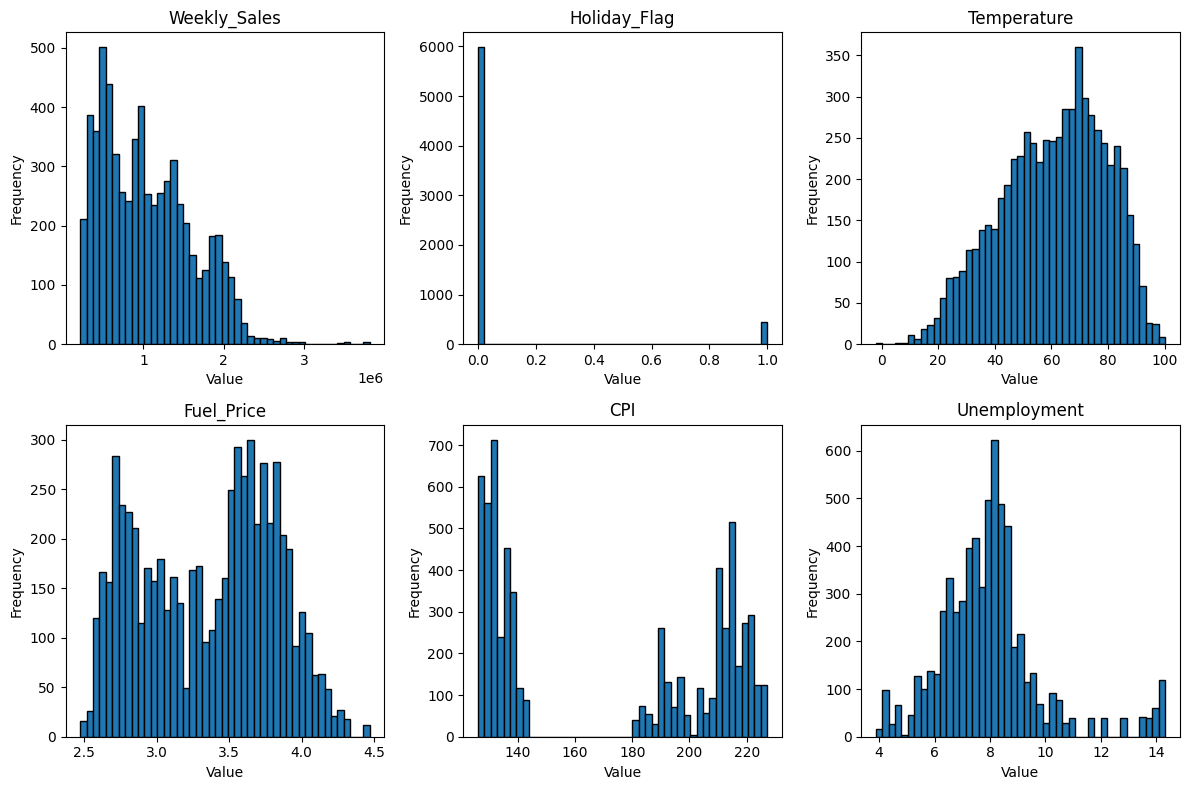

In [4]:
# Define the number of rows and columns for the grid
n_rows = 2
n_cols = 3

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Define the features to plot
features = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Loop through each feature and plot it in a subplot
for i, var in enumerate(features):
    # Create a histogram in the current subplot
    axes[i].hist(df[var], edgecolor='black', bins=45)
    
    # Set the title, x-label, and y-label for the current subplot
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots and show the plot
plt.tight_layout()
plt.show()

# Normalize data

In [5]:
# Min-Max normalization

# Store the minimum and maximum values for the "Weekly_Sales" column before normalization
y_min = dfn["Weekly_Sales"].min()
y_max = dfn["Weekly_Sales"].max()

for var in features:
  var_data = dfn[var]

  min = var_data.min()
  max = var_data.max()
  scaled = (var_data - min) / (max - min)

  dfn[var] = scaled

# Scale date to integer representing weeks since start
dfn['Date'] = pd.to_datetime(dfn['Date'], format='%d-%m-%Y')
dfn['Date'] = ((dfn['Date'] - dfn['Date'].min()).dt.days / 7)

dfn

Store   Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1    0.0      0.397291           0.0     0.434149    0.050100   
1         1    1.0      0.396811           1.0     0.396967    0.038076   
2         1    2.0      0.388501           0.0     0.410861    0.021042   
3         1    3.0      0.332458           0.0     0.476419    0.044589   
4         1    4.0      0.372661           0.0     0.475147    0.076653   
...     ...    ...           ...           ...          ...         ...   
6430     45  138.0      0.139437           0.0     0.654990    0.764028   
6431     45  139.0      0.145057           0.0     0.655088    0.758016   
6432     45  140.0      0.145337           0.0     0.553131    0.765531   
6433     45  141.0      0.140810           0.0     0.572701    0.750000   
6434     45  142.0      0.152491           0.0     0.595988    0.706413   

           CPI  Unemployment  
0     0.840500      0.405118  
1     0.841941      0.405118  
2     0.842405      0.405118  
3     0.842707      0.405118  
4     0.843008      0.405118  
...        ...           ...  
6430  0.651876      0.460514  
6431  0.653427      0.458884  
6432  0.654977      0.458884  
6433  0.655013      0.458884  
6434  0.654796      0.458884  

[6435 rows x 8 columns]

In [6]:
# Z-score normalization

# Store the mean and standard deviation for the "Weekly_Sales" column before normalization
y_mean = dfz["Weekly_Sales"].mean()
y_std = dfz["Weekly_Sales"].std()

for var in features:
  var_data = dfz[var]
  mean = var_data.mean()
  std = var_data.std()
  standardized = (var_data - mean) / std

  dfz[var] = standardized

# Scale date to integer representing weeks since start
dfz['Date'] = pd.to_datetime(dfz['Date'], format='%d-%m-%Y')
dfz['Date'] = ((dfz['Date'] - dfz['Date'].min()).dt.days / 7)

dfz

Store   Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1    0.0      1.057338     -0.274183    -0.995058   -1.713667   
1         1    1.0      1.054266      3.646633    -1.201077   -1.765952   
2         1    2.0      1.001128     -0.274183    -1.124091   -1.840023   
3         1    3.0      0.642778     -0.274183    -0.760848   -1.737631   
4         1    4.0      0.899844     -0.274183    -0.767896   -1.598203   
...     ...    ...           ...           ...          ...         ...   
6430     45  138.0     -0.591443     -0.274183     0.228584    1.390775   
6431     45  139.0     -0.555507     -0.274183     0.229126    1.364632   
6432     45  140.0     -0.553719     -0.274183    -0.335799    1.397311   
6433     45  141.0     -0.582670     -0.274183    -0.227368    1.329776   
6434     45  142.0     -0.507974     -0.274183    -0.098335    1.140241   

           CPI  Unemployment  
0     1.004097      0.056959  
1     1.007802      0.056959  
2     1.008996      0.056959  
3     1.009771      0.056959  
4     1.010546      0.056959  
...        ...           ...  
6430  0.519229      0.365080  
6431  0.523215      0.356018  
6432  0.527200      0.356018  
6433  0.527292      0.356018  
6434  0.526734      0.356018  

[6435 rows x 8 columns]

<ipython-input-7-7fed75ae5943>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


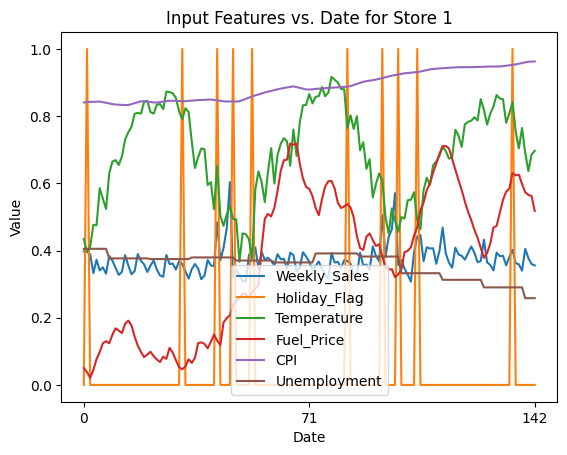

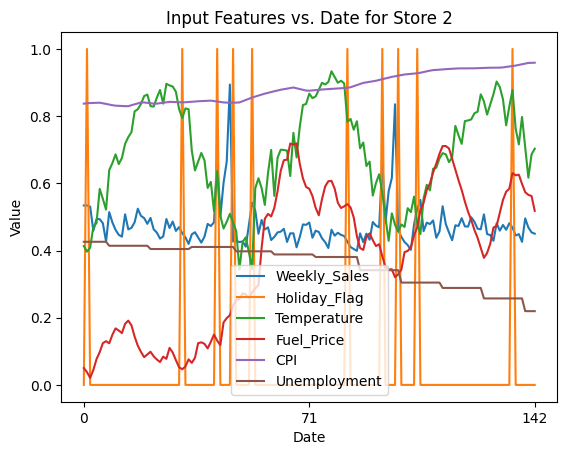

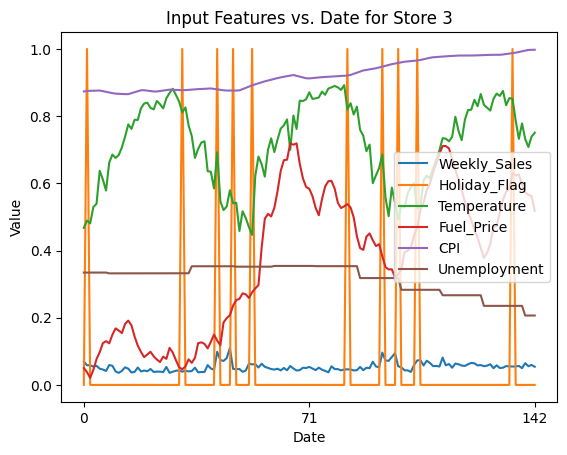

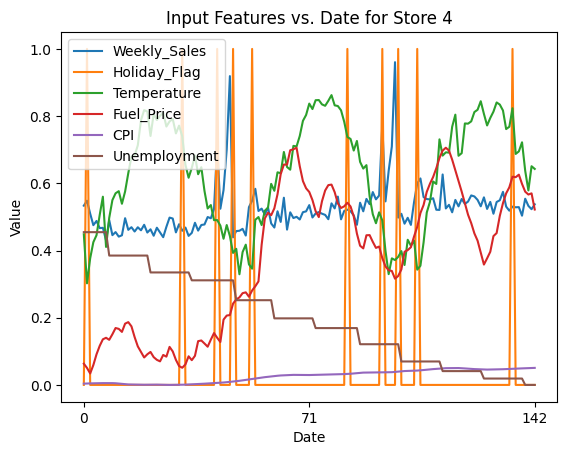

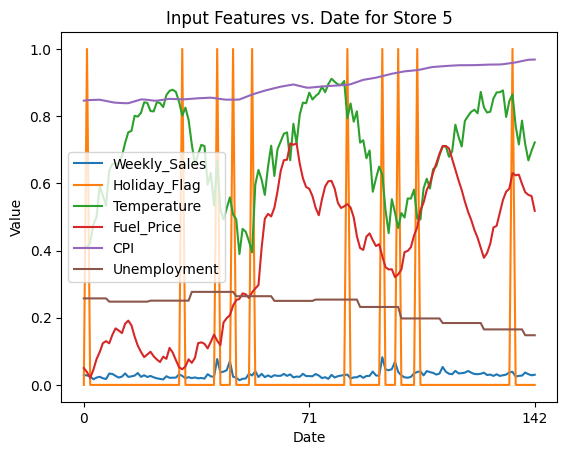

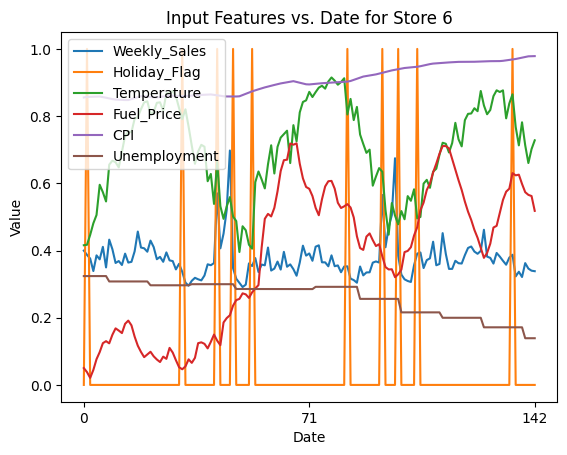

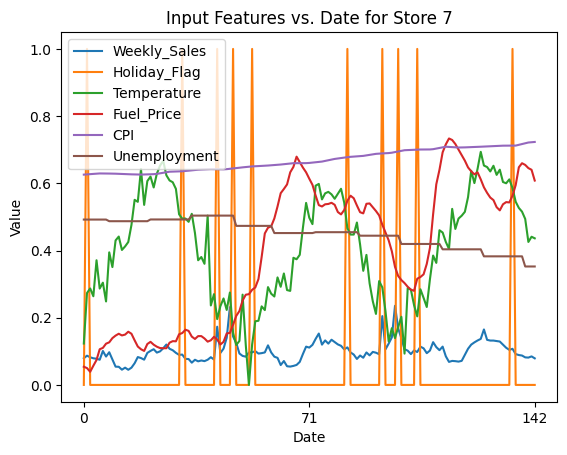

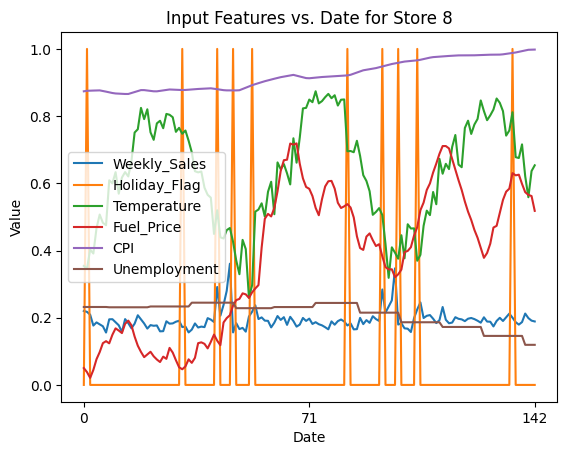

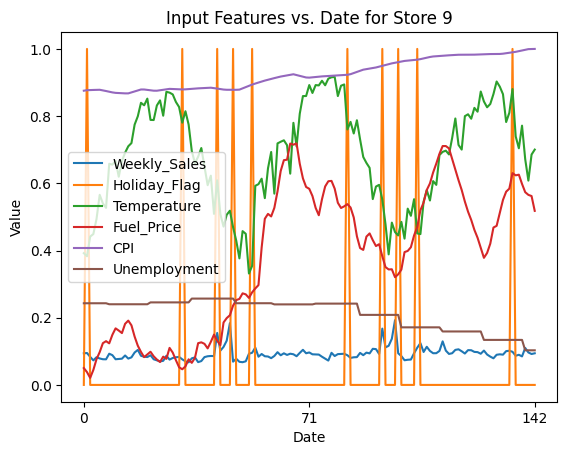

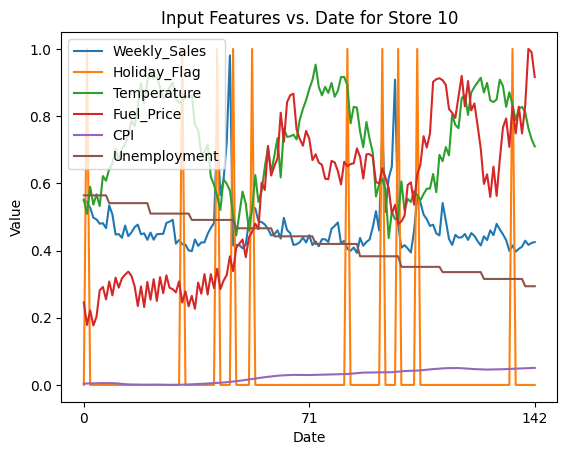

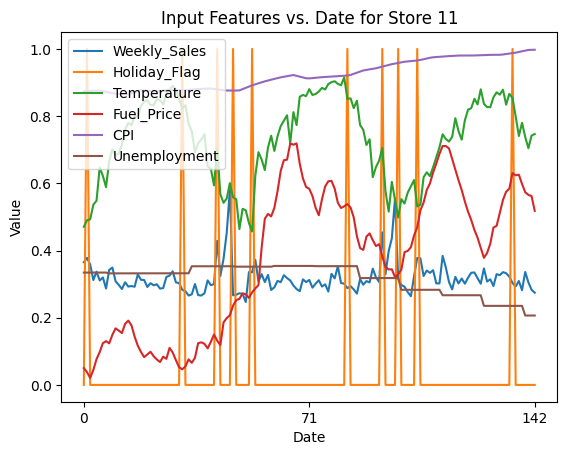

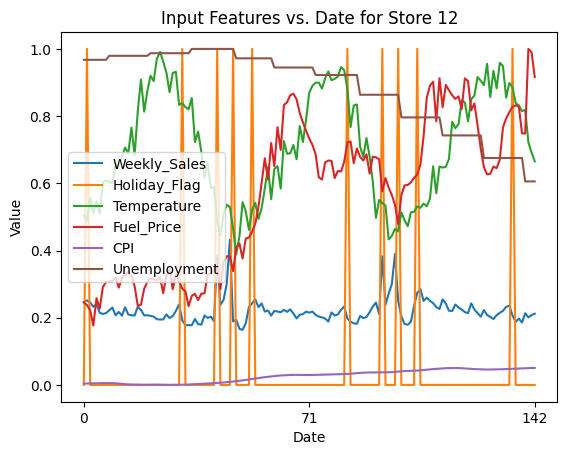

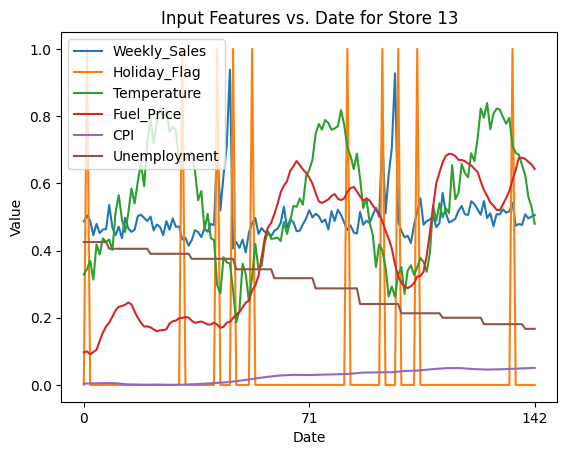

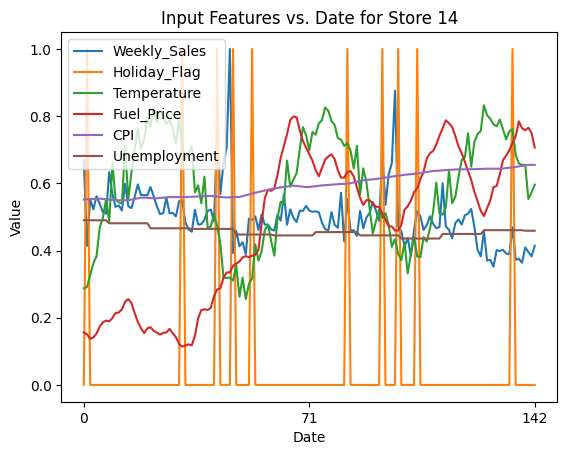

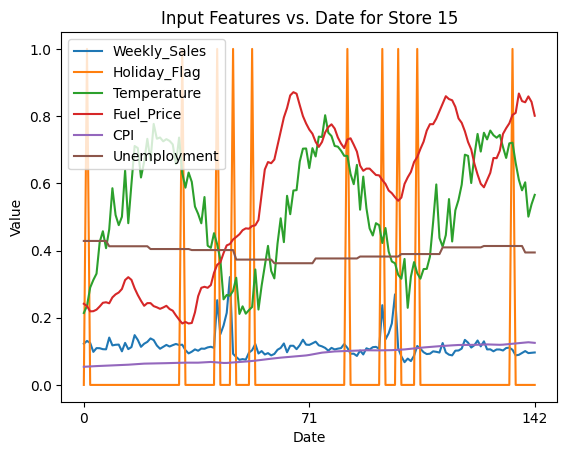

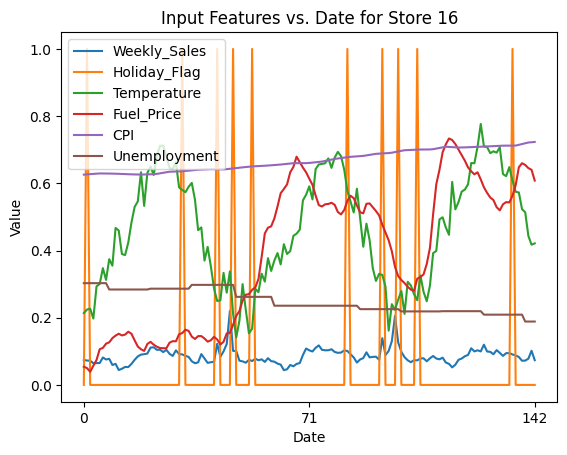

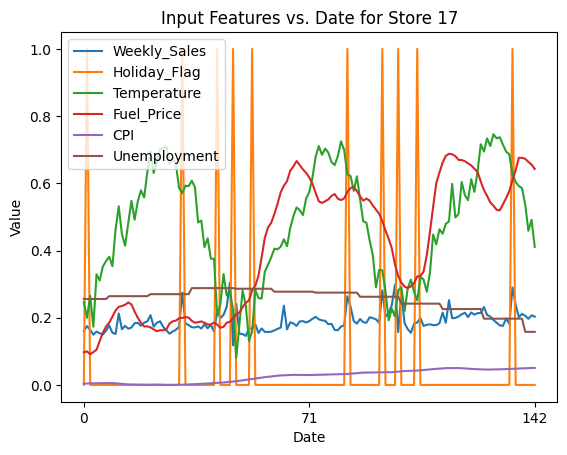

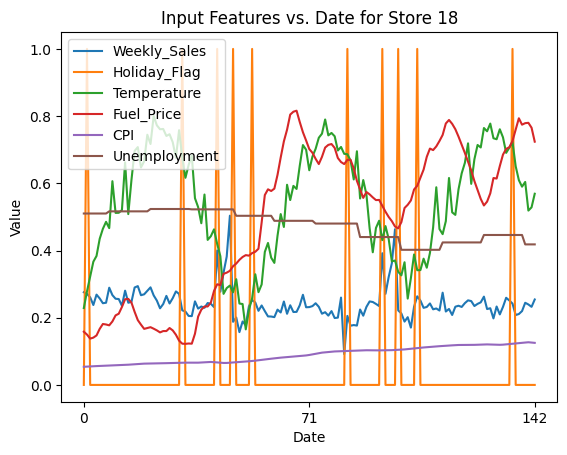

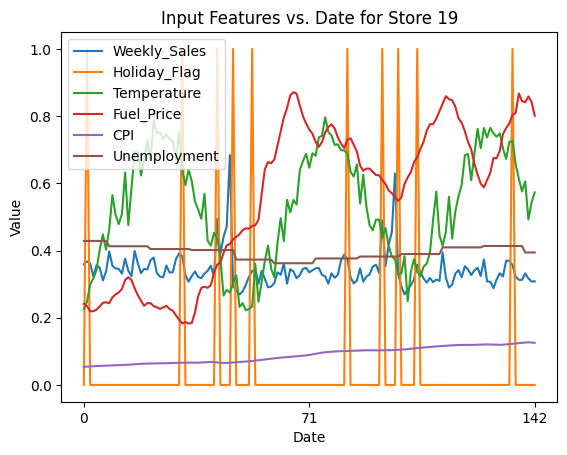

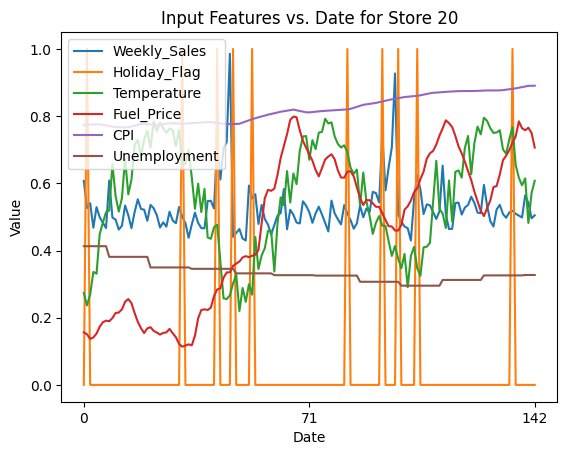

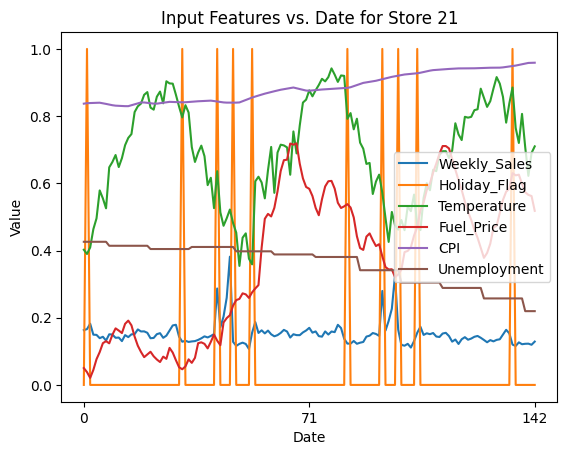

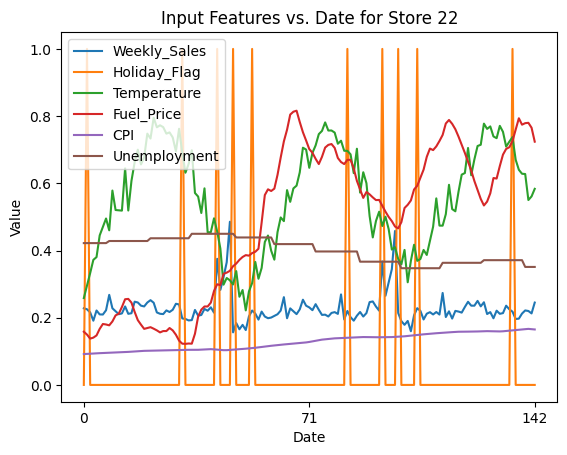

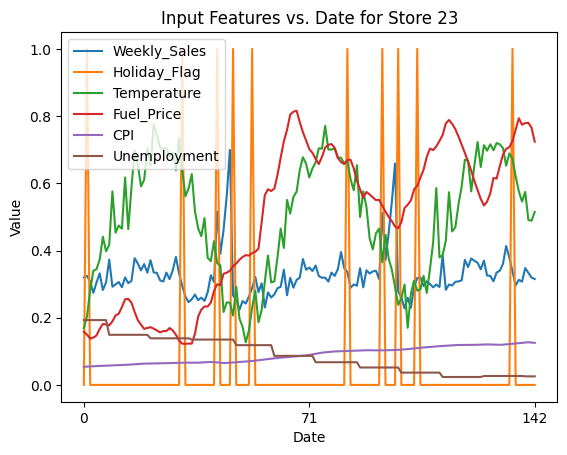

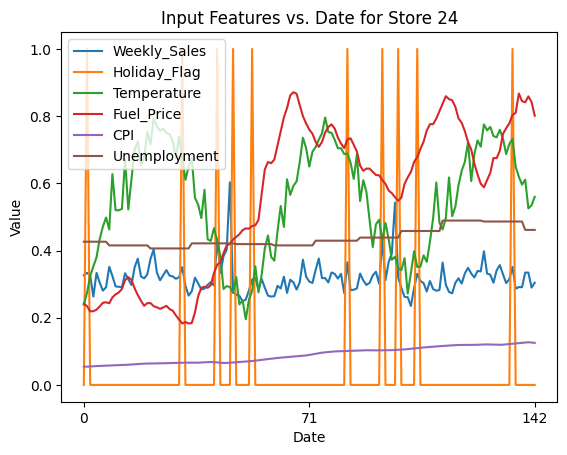

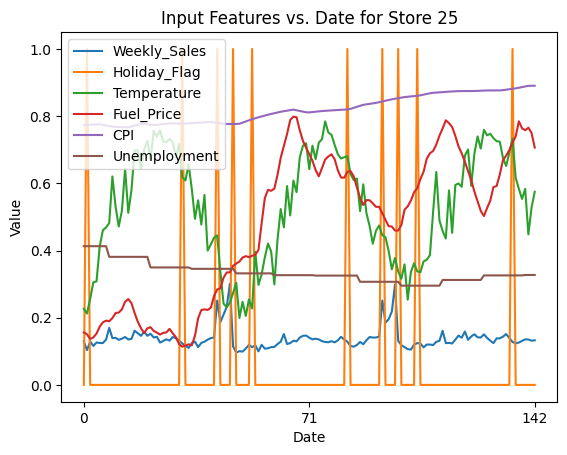

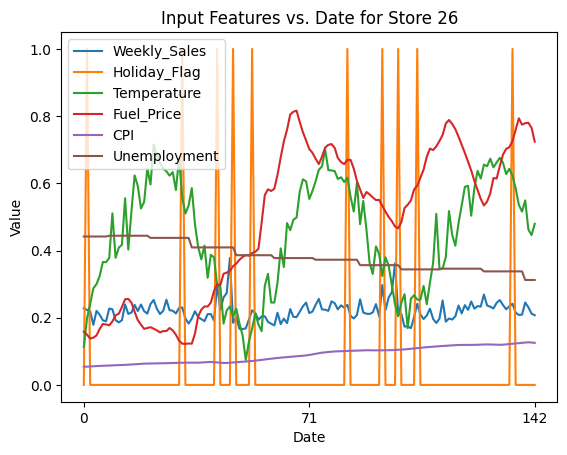

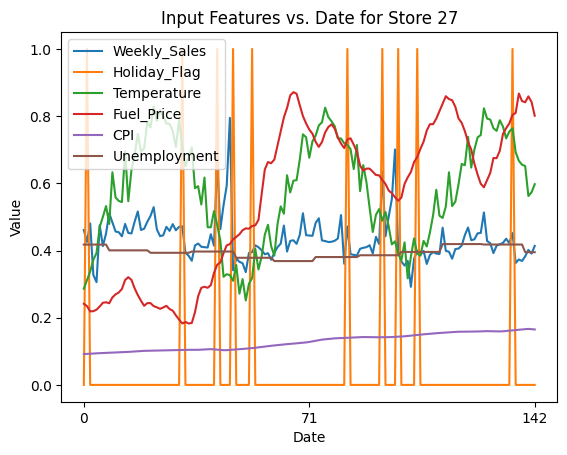

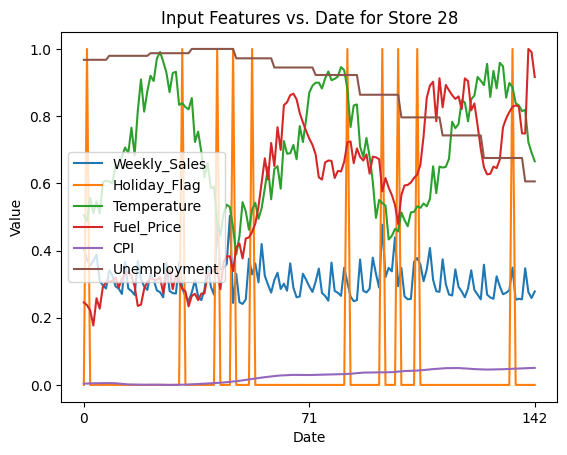

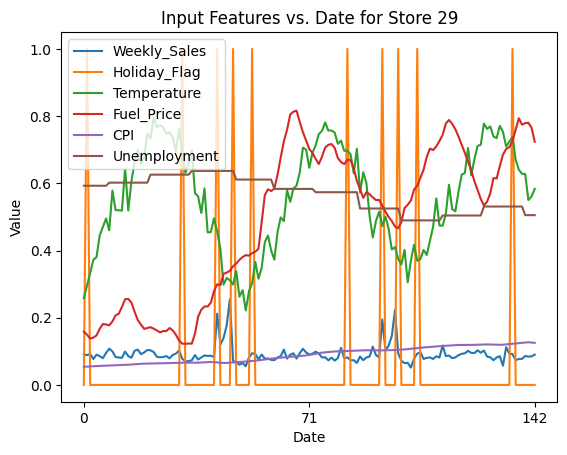

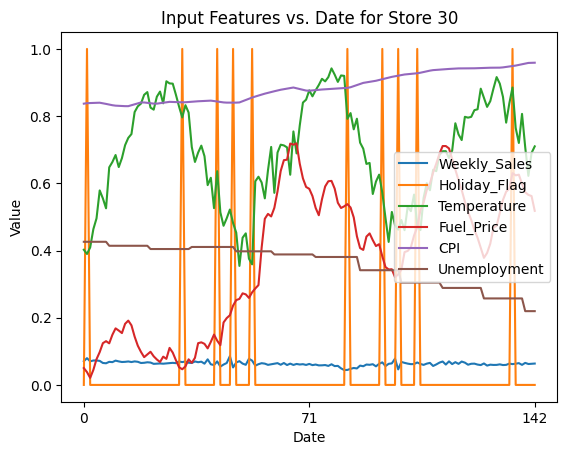

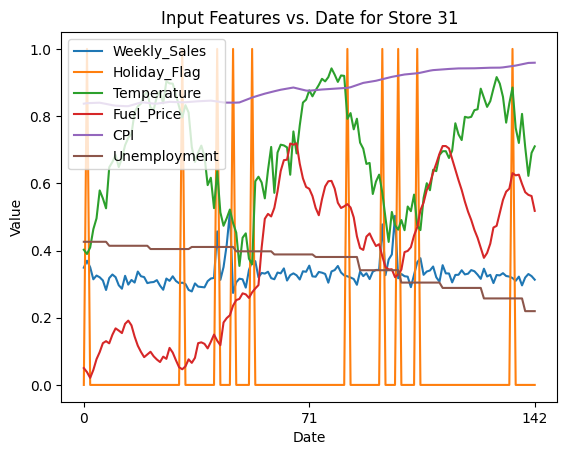

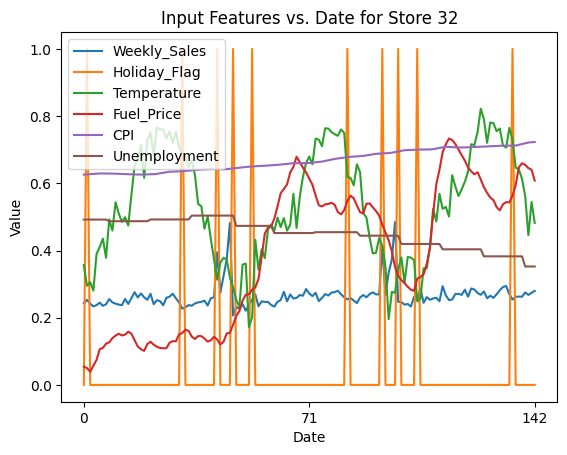

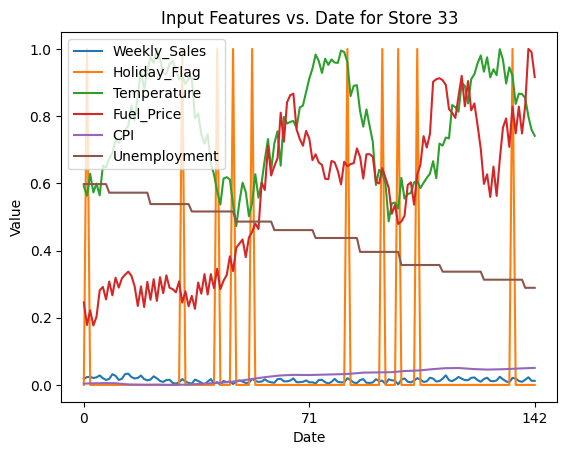

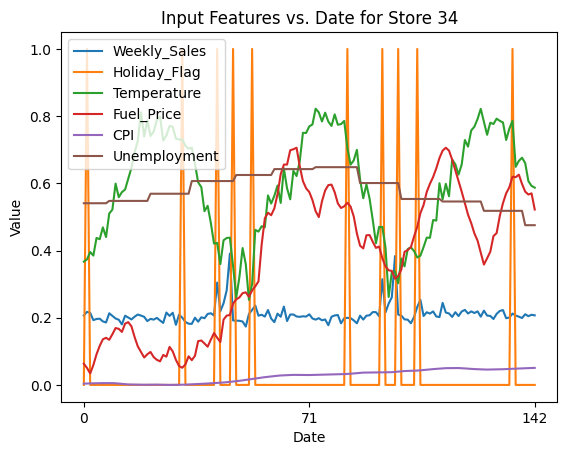

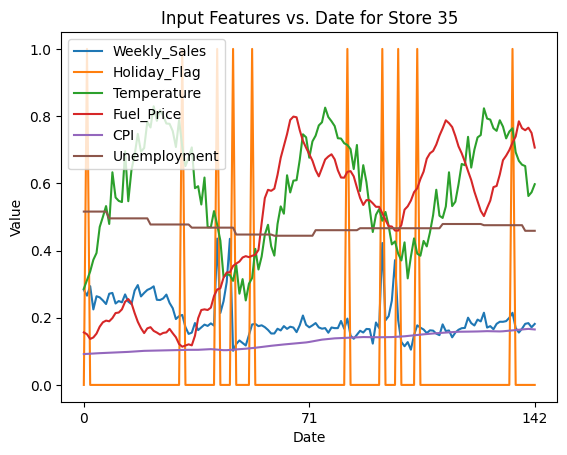

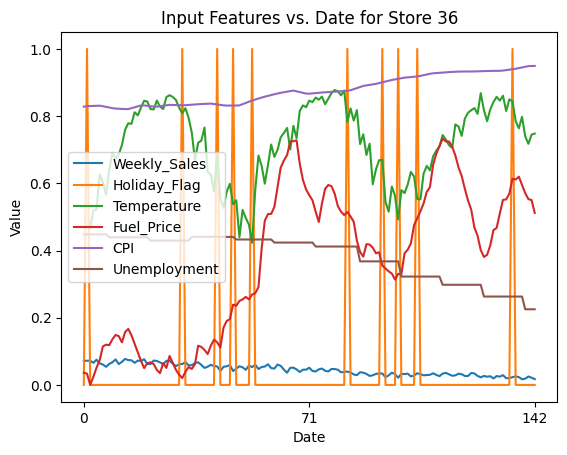

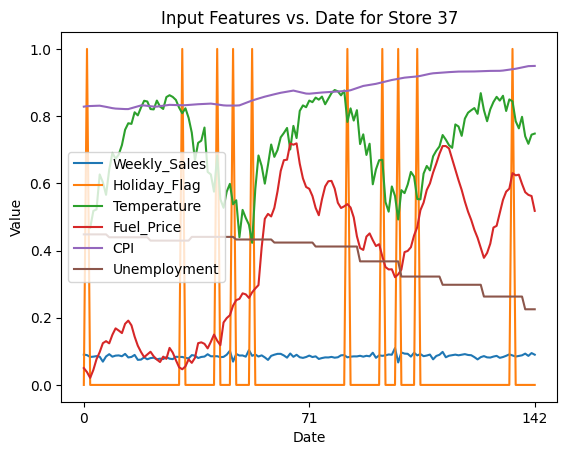

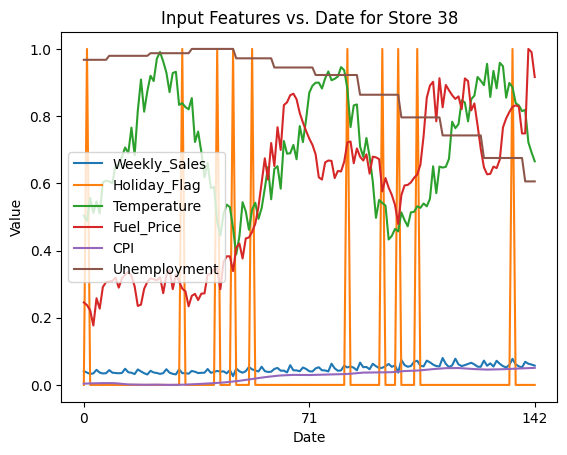

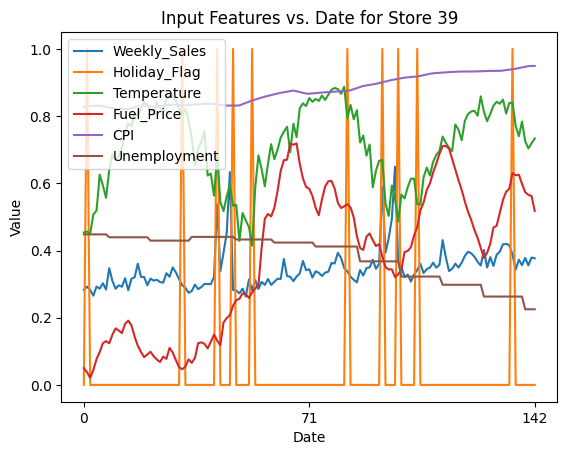

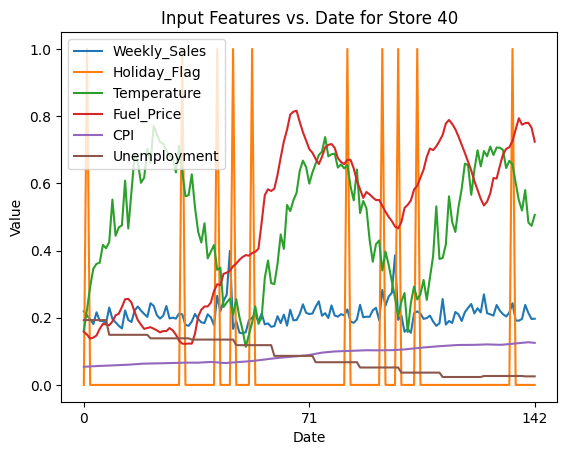

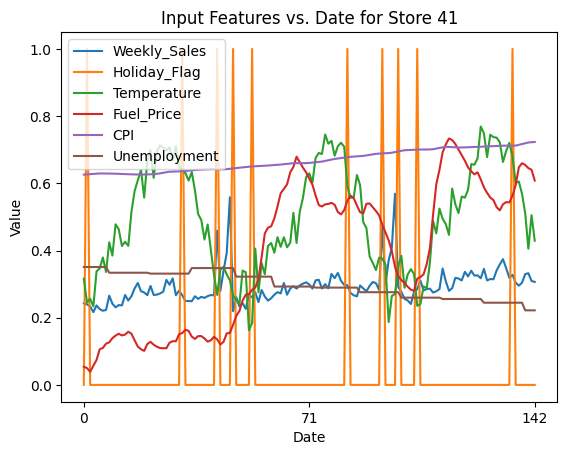

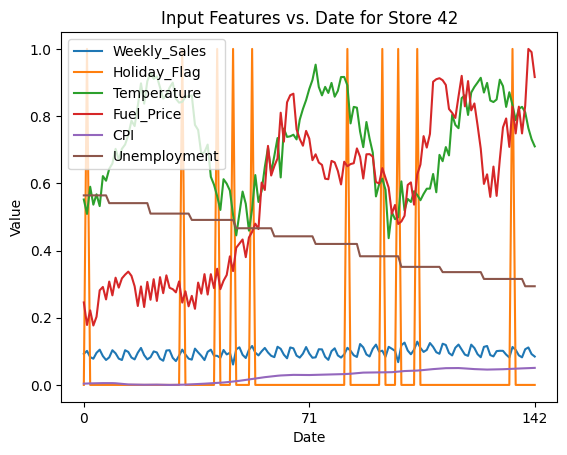

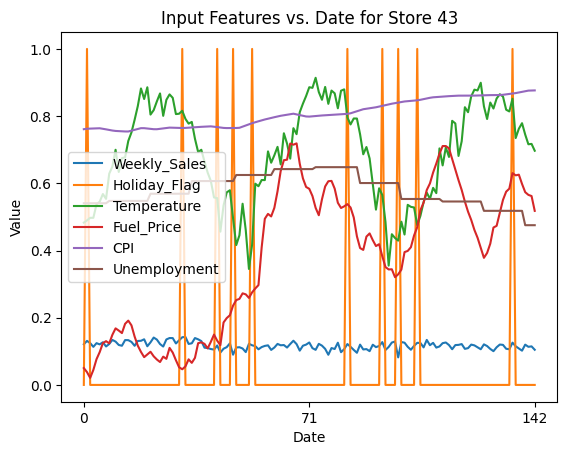

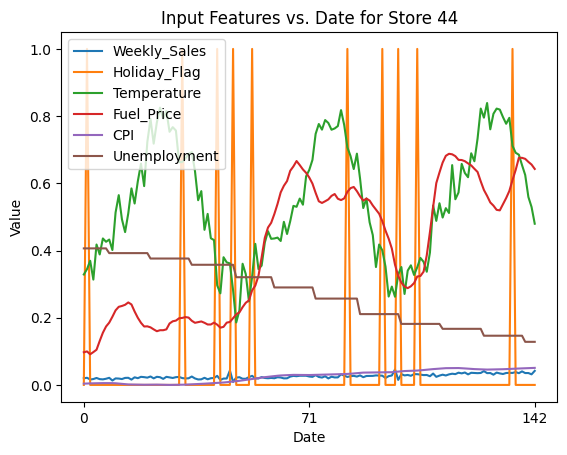

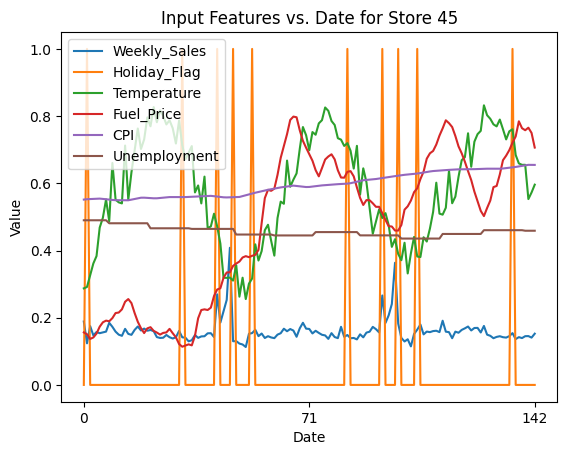

In [7]:
# Plot date vs normalized feature values, with each graph representing a different store
stores = dfn['Store'].unique()

for store in stores:
  store_data = dfn[dfn['Store'] == store]

  plt.figure()

  for i, var in enumerate(features):
    var_data = store_data[var]
    date_data = store_data['Date']

    plt.plot(date_data, var_data, label=var, color=f'C{i}')

  plt.title(f'Input Features vs. Date for Store {store}')
  plt.xlabel("Date")
  plt.ylabel("Value")
  plt.legend()

  # Get the first, middle, and last dates for the current store
  n_dates = len(date_data)
  first_date = date_data.iloc[0]
  middle_date = date_data.iloc[n_dates // 2]
  last_date = date_data.iloc[-1]

  # Set the x-ticks to only show the first, middle, and last dates
  plt.xticks([first_date, middle_date, last_date])


plt.show()

# Overfit model

In [20]:
# Z-score

# Prepare input and output data
X = dfz.drop(["Weekly_Sales", "Date"], axis=1)
y = dfz["Weekly_Sales"]

# Define the model architecture
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[len(X.columns)]),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1)
])

optimizer = Adam(learning_rate=0.001)
# Compile the model
model.compile(loss='mean_absolute_error', optimizer=optimizer)

# Train the model
history = model.fit(X, y, epochs=1000, verbose=1)

# Get predictions
y_pred = model.predict(X)

# Apply inverse transformation to predictions and true target values
y_pred_orig = (y_pred * y_std) + y_mean
y_orig = (y * y_std) + y_mean

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_orig, y_pred_orig)

# Evaluate the model using the same dataset
mse = model.evaluate(X, y, verbose=0)
print(f"Mean absolute error: {mse}, Mean absolute error (original): {mae}")

Epoch 1/1000
202/202 [==============================] - 2s 8ms/step - loss: 0.7491
Epoch 2/1000
202/202 [==============================] - 2s 9ms/step - loss: 0.6486
Epoch 3/1000
202/202 [==============================] - 1s 6ms/step - loss: 0.6210
Epoch 4/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.5993
Epoch 5/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.5717
Epoch 6/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.5556
Epoch 7/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.5284
Epoch 8/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.5043
Epoch 9/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.4756
Epoch 10/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.4414
Epoch 11/1000
202/202 [==============================] - 1s 5ms/step - loss: 0.4215
Epoch 12/1000
202/202 [==============================] - 1s 6ms/step - loss: 0.4096
E

# Model selection & eval

51/51 [==============================] - 0s 2ms/step


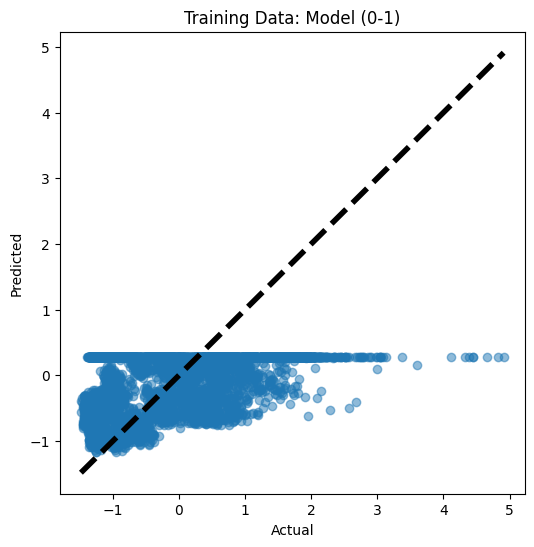

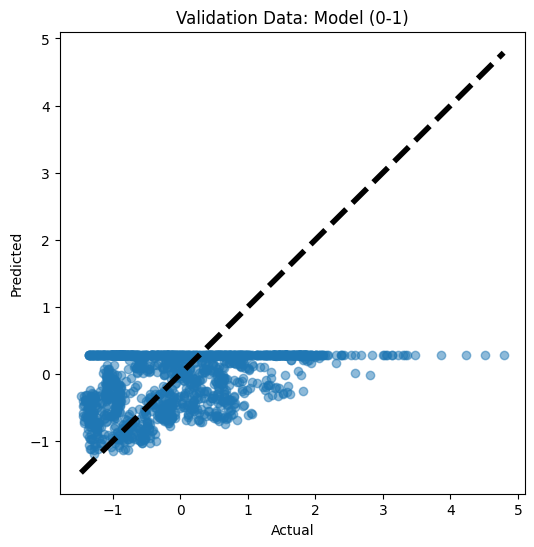

Model (0-1): Train MAE (Orig) = 433271.8859793307, Validation MAE (Orig) = 434836.26951678057


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


51/51 [==============================] - 0s 1ms/step


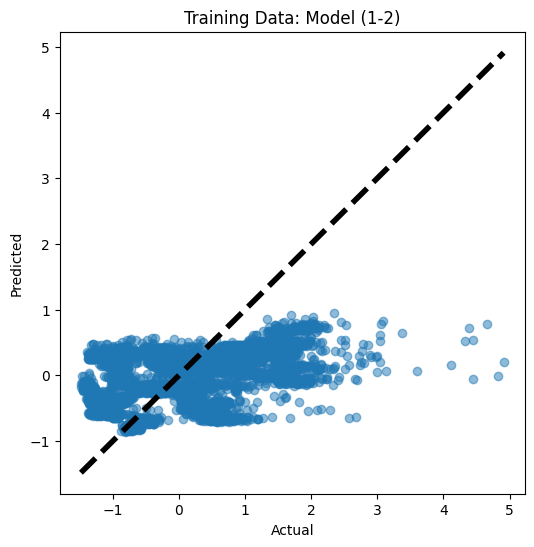

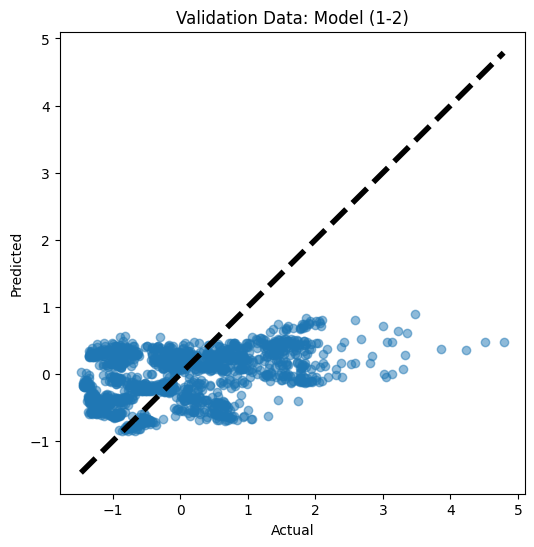

Model (1-2): Train MAE (Orig) = 430094.2153968089, Validation MAE (Orig) = 428445.6365118086


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


51/51 [==============================] - 0s 1ms/step


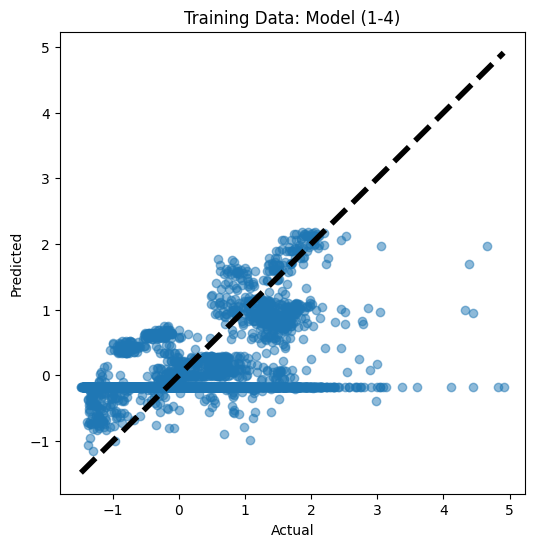

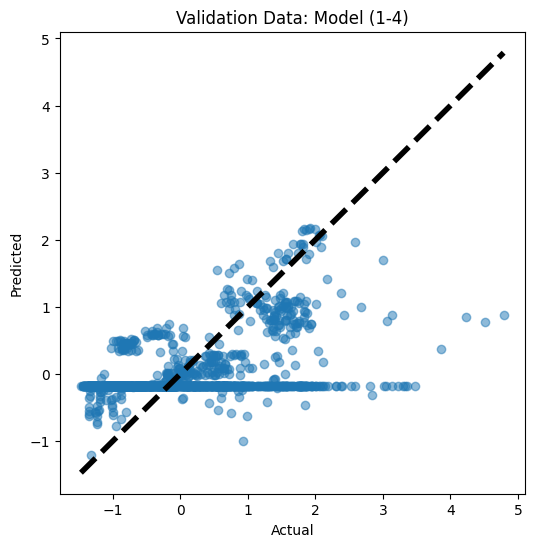

Model (1-4): Train MAE (Orig) = 402787.99937681307, Validation MAE (Orig) = 407733.0521177751


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


51/51 [==============================] - 0s 1ms/step


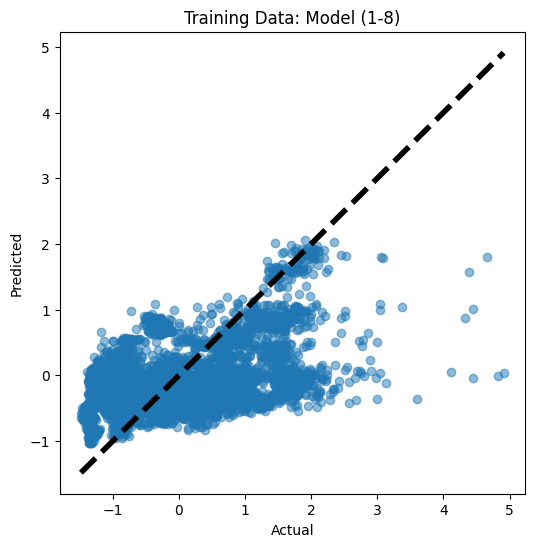

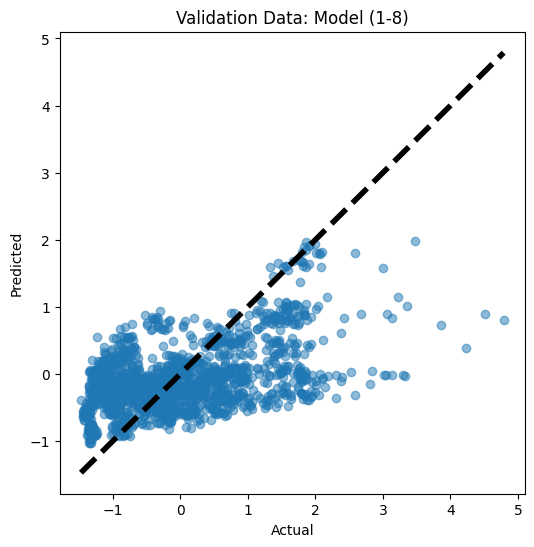

Model (1-8): Train MAE (Orig) = 393563.90552009945, Validation MAE (Orig) = 397812.109760721


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


51/51 [==============================] - 0s 1ms/step


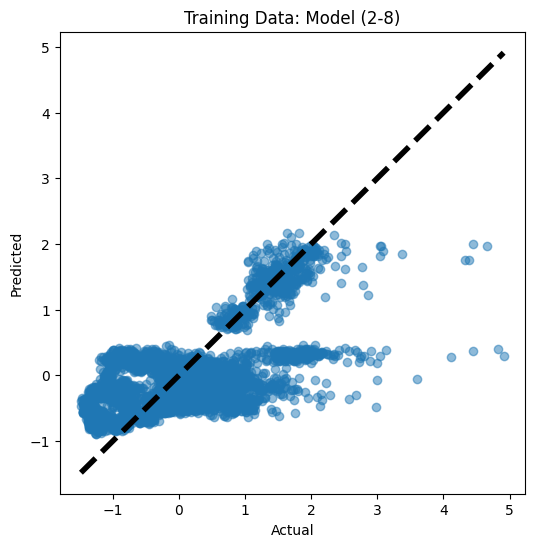

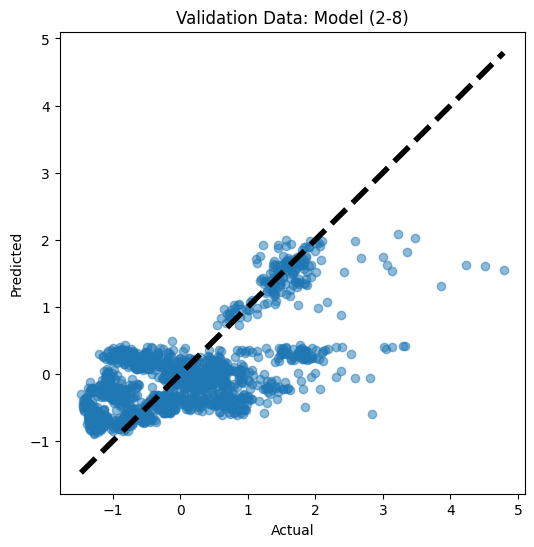

Model (2-8): Train MAE (Orig) = 343817.9398818898, Validation MAE (Orig) = 351107.5221799254


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


51/51 [==============================] - 0s 2ms/step


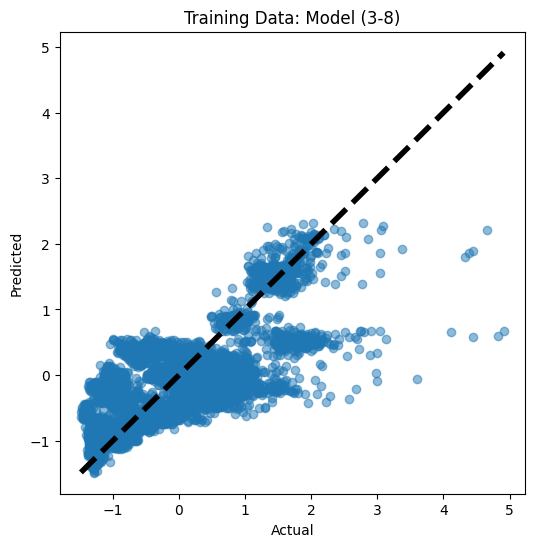

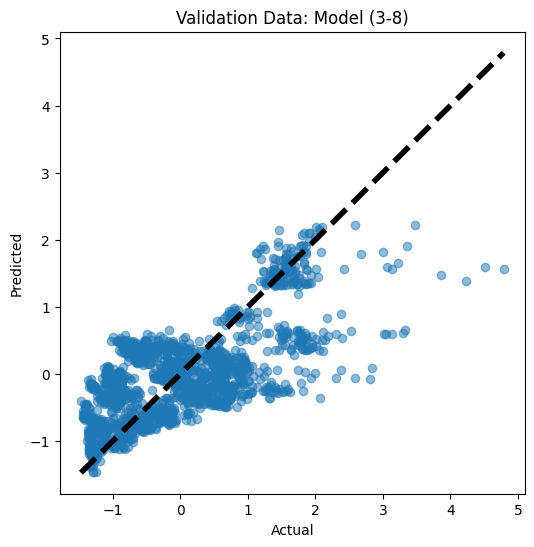

Model (3-8): Train MAE (Orig) = 317142.0383930791, Validation MAE (Orig) = 329792.5407527968


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


51/51 [==============================] - 0s 1ms/step


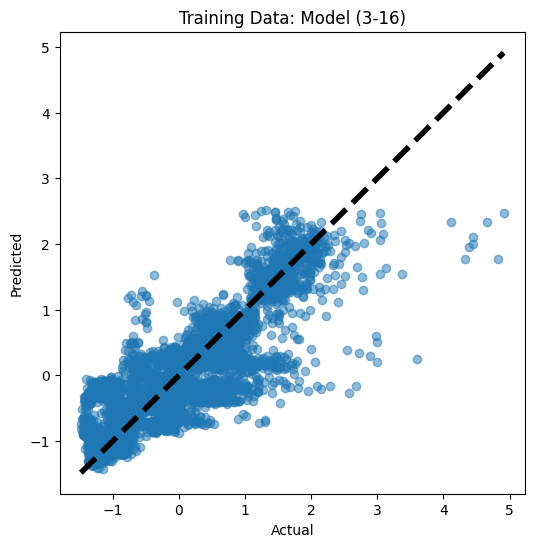

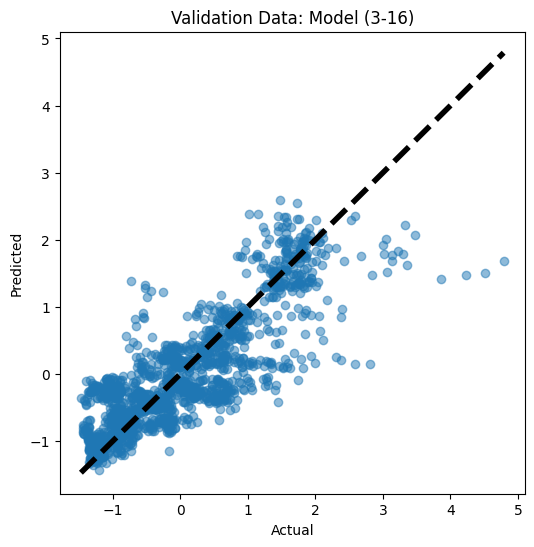

Model (3-16): Train MAE (Orig) = 223078.72746555117, Validation MAE (Orig) = 236902.3283802051


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


51/51 [==============================] - 0s 2ms/step


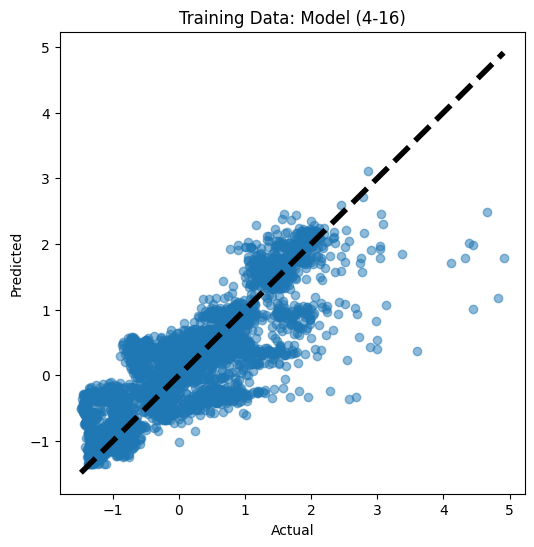

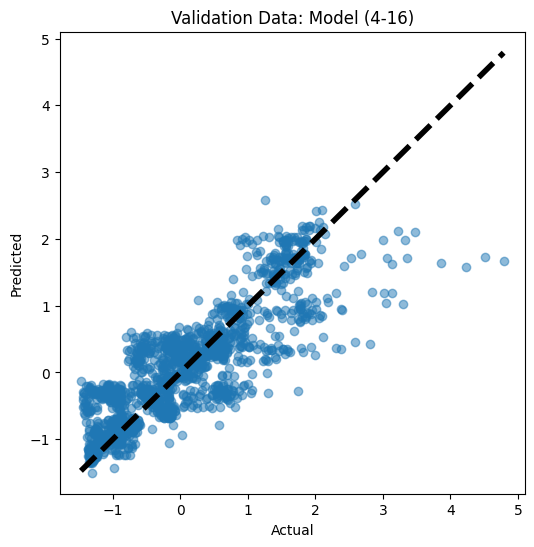

Model (4-16): Train MAE (Orig) = 224368.3648466639, Validation MAE (Orig) = 235436.19445463025


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


51/51 [==============================] - 0s 2ms/step


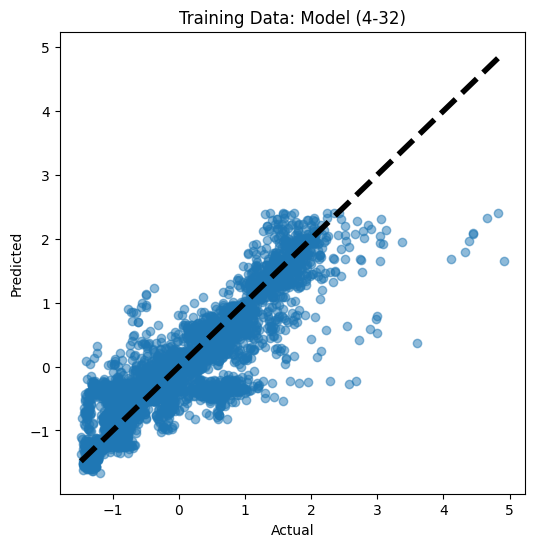

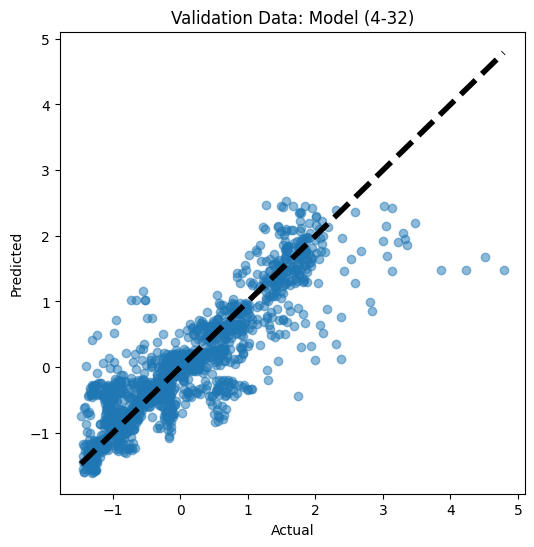

Model (4-32): Train MAE (Orig) = 170312.36260697263, Validation MAE (Orig) = 182383.74729101927


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


51/51 [==============================] - 0s 2ms/step


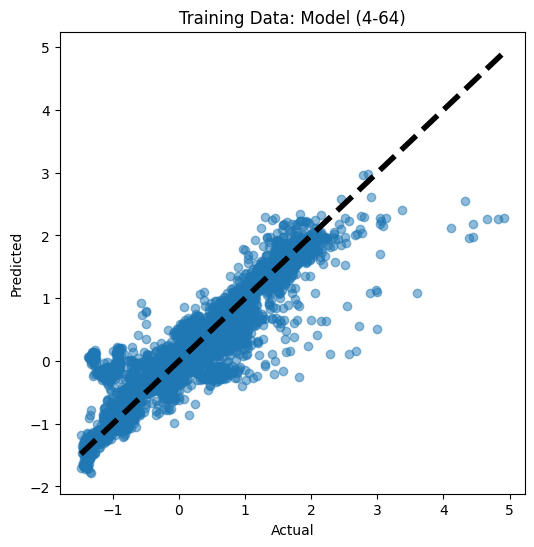

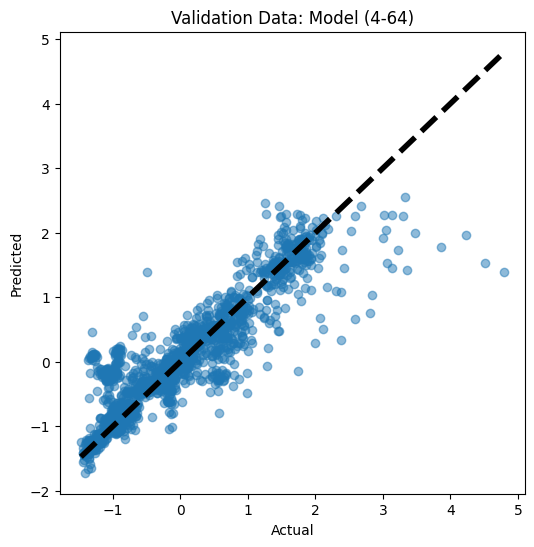

Model (4-64): Train MAE (Orig) = 142070.61427994198, Validation MAE (Orig) = 163007.29542262273


<ipython-input-30-b04d950d6e12>:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",


Model  MAE on Training Set  MAE on Validation Set
0   Model (0-1)        433271.885979          434836.269517
1   Model (1-2)        430094.215397          428445.636512
2   Model (1-4)        402787.999377          407733.052118
3   Model (1-8)        393563.905520          397812.109761
4   Model (2-8)        343817.939882          351107.522180
5   Model (3-8)        317142.038393          329792.540753
6  Model (3-16)        223078.727466          236902.328380
7  Model (4-16)        224368.364847          235436.194455
8  Model (4-32)        170312.362607          182383.747291
9  Model (4-64)        142070.614280          163007.295423

In [30]:
# Z-score

# Shuffle the dataset
shuffled_df = dfz.sample(frac=1, random_state=42)

# Split the dataset into training and validation sets
split_ratio = 0.75
split_index = int(len(shuffled_df) * split_ratio)
train_df = shuffled_df.iloc[:split_index]
val_df = shuffled_df.iloc[split_index:]

# Prepare input and output data for training and validation sets
X_train = train_df.drop(["Weekly_Sales", "Date"], axis=1)
y_train = train_df["Weekly_Sales"]

X_val = val_df.drop(["Weekly_Sales", "Date"], axis=1)
y_val = val_df["Weekly_Sales"]


# Define a function to create a model with a specified number of hidden layers and neurons per layer
def create_model(num_hidden_layers, neurons_per_layer):
    model = keras.Sequential()
    model.add(layers.Dense(neurons_per_layer, activation='relu', input_shape=[len(X_train.columns)]))
    
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(layers.Dense(1))
    return model

# Define model architectures to test
models_to_test = [
    (0, 1),  # Linear regression (0 hidden layers)
    (1, 2),  # 2-1
    (1, 4),  # 4-1
    (1, 8),  # 8-1
    (2, 8),  # 8-1
    (3, 8),  # 8-8-1
    (3, 16),  # 16-16-16-1
    (4, 16),  # 16-16-16-16-1
    (4, 32),  # 32-32-32-32-1
    (4, 64)   #64-64-64-64-1
]

# Create a list to store the training history for each model
histories = []

results_df = pd.DataFrame(columns=["Model", "MAE on Training Set", "MAE on Validation Set"])

# Train and evaluate each model
for num_hidden_layers, neurons_per_layer in models_to_test:
    model = create_model(num_hidden_layers, neurons_per_layer)
    optimizer = Adam(learning_rate=0.001) # Default 0.001
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    checkpoint = ModelCheckpoint(f"best_model_{num_hidden_layers}_{neurons_per_layer}.h5", save_best_only=True, monitor='val_loss', mode='min')

    history = model.fit(
        X_train, y_train,
        epochs=100,
        verbose=0,
        validation_data=(X_val, y_val),
        callbacks=[checkpoint]
    )

    # Append the training history to the list
    histories.append(history)

    # Get predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Scatter plot for training data
    plt.figure(figsize=(6, 6))
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Training Data: Model ({num_hidden_layers}-{neurons_per_layer})')
    plt.show()

    # Scatter plot for validation data
    plt.figure(figsize=(6, 6))
    plt.scatter(y_val, y_val_pred, alpha=0.5)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Validation Data: Model ({num_hidden_layers}-{neurons_per_layer})')
    plt.show()


    # # Calculate mean squared error (MSE)
    # train_mse = model.evaluate(X_train, y_train, verbose=0)
    # val_mse = model.evaluate(X_val, y_val, verbose=0)

    # # Calculate mean absolute percentage error (MAPE) - doesn't work well because values are close to zero, leading to very high error percentages
    # train_mape = np.mean(np.abs((y_train - y_train_pred.reshape(-1)) / y_train)) * 100
    # val_mape = np.mean(np.abs((y_val - y_val_pred.reshape(-1)) / y_val)) * 100

    # Calculate mean absolute error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred.reshape(-1))
    val_mae = mean_absolute_error(y_val, y_val_pred.reshape(-1))

    # Apply inverse transformation to predictions and true target values
    y_train_pred_orig = (y_train_pred * y_std) + y_mean
    y_train_orig = (y_train * y_std) + y_mean
    y_val_pred_orig = (y_val_pred * y_std) + y_mean
    y_val_orig = (y_val * y_std) + y_mean

    # Calculate evaluation metrics on the original scale
    train_mae_orig = mean_absolute_error(y_train_orig, y_train_pred_orig)
    val_mae_orig = mean_absolute_error(y_val_orig, y_val_pred_orig)

    print(f"Model ({num_hidden_layers}-{neurons_per_layer}): Train MAE (Orig) = {train_mae_orig}, Validation MAE (Orig) = {val_mae_orig}")
    # Train MSE = {train_mse}, Validation MSE = {val_mse}, Train MAE = {train_mae}, Validation MAE = {val_mae},

    results_df = results_df.append({"Model": f"Model ({num_hidden_layers}-{neurons_per_layer})",
                                 "MAE on Training Set": train_mae_orig,
                                 "MAE on Validation Set": val_mae_orig},
                                ignore_index=True)

results_df

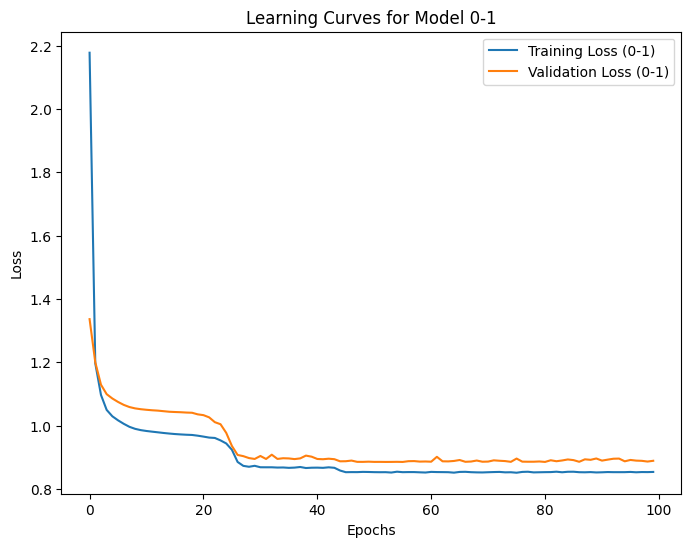

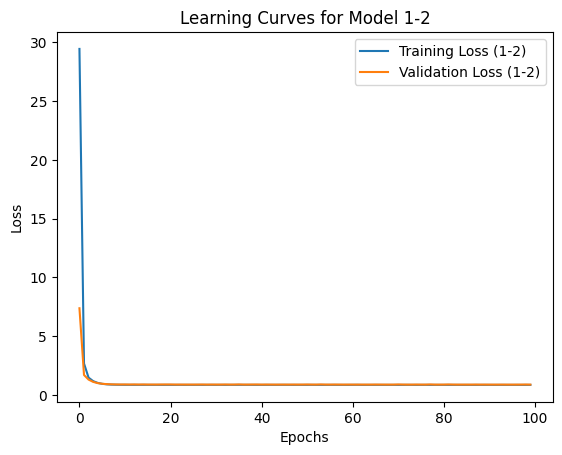

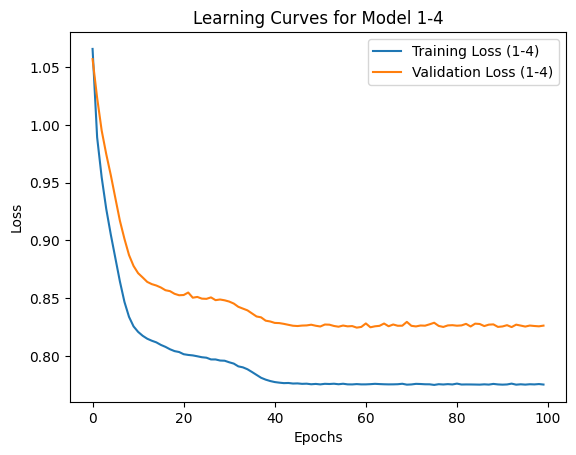

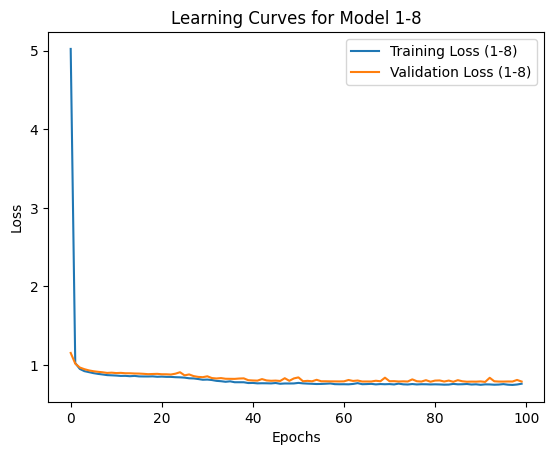

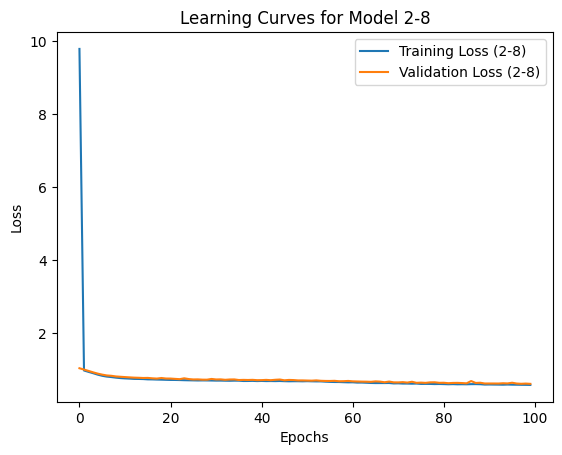

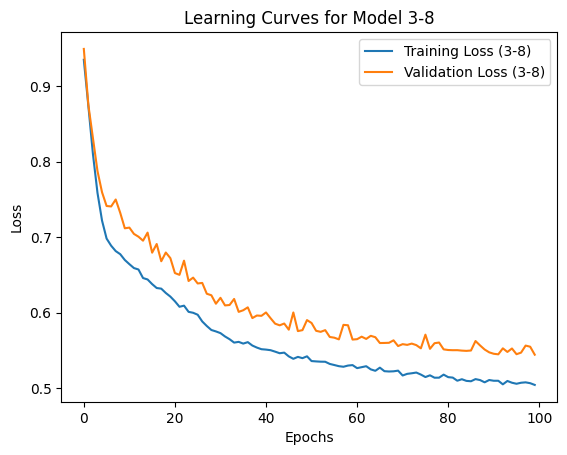

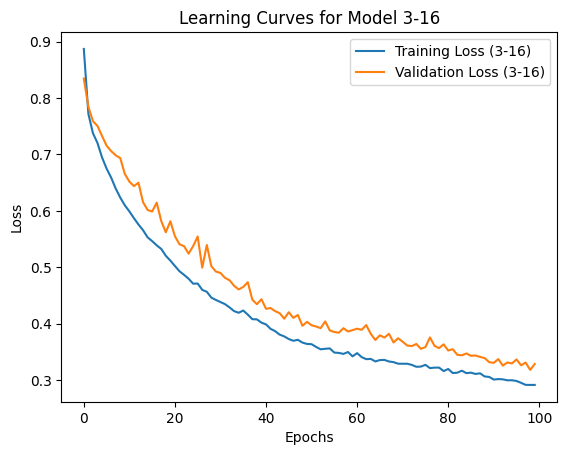

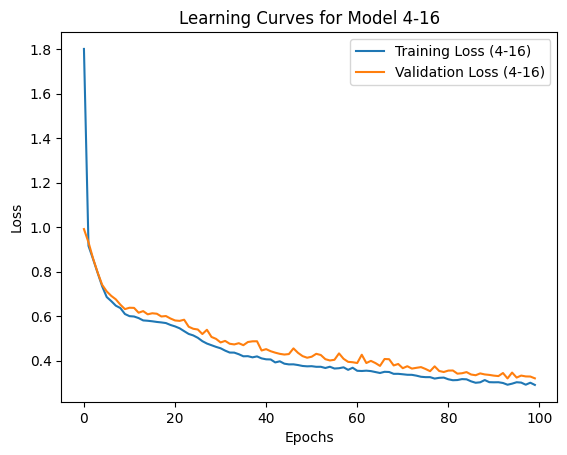

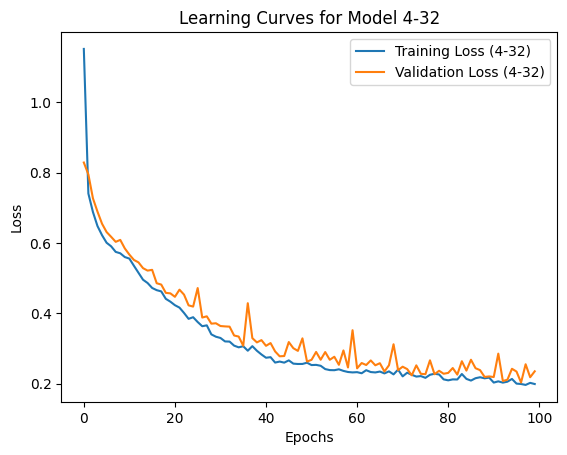

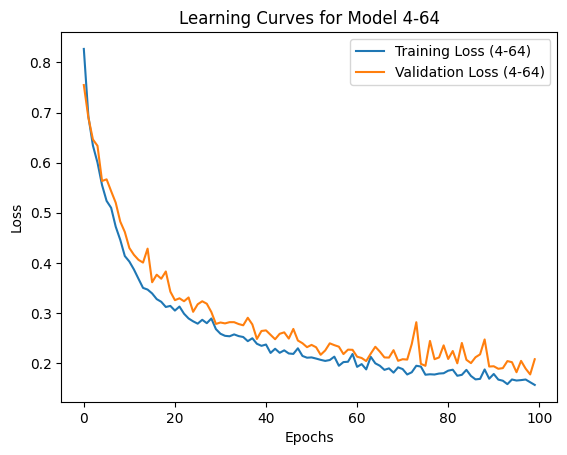

In [31]:
def plot_learning_curves(histories, models_to_test):
    plt.figure(figsize=(8, 6))
    
    for idx, (num_hidden_layers, neurons_per_layer) in enumerate(models_to_test):
        plt.plot(histories[idx].history['loss'], label=f'Training Loss ({num_hidden_layers}-{neurons_per_layer})')
        plt.plot(histories[idx].history['val_loss'], label=f'Validation Loss ({num_hidden_layers}-{neurons_per_layer})')
    
        plt.title(f'Learning Curves for Model {num_hidden_layers}-{neurons_per_layer}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Call the function to plot the learning curves
plot_learning_curves(histories, models_to_test)

# Finding feature importance

In [39]:
# Shuffle the dataset
shuffled_df = dfz.sample(frac=1, random_state=42)

# Split the dataset into training and validation sets
split_ratio = 0.75
split_index = int(len(shuffled_df) * split_ratio)
train_df = shuffled_df.iloc[:split_index]
val_df = shuffled_df.iloc[split_index:]

# Prepare input and output data for training and validation sets
X_train = train_df[["Store"]]
y_train = train_df["Weekly_Sales"]

X_val = val_df[["Store"]]
y_val = val_df["Weekly_Sales"]


# Define a function to create a model with a specified number of hidden layers and neurons per layer
def create_model(num_hidden_layers, neurons_per_layer):
    model = keras.Sequential()
    model.add(layers.Dense(neurons_per_layer, activation='relu', input_shape=[len(X_train.columns)]))
    
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(layers.Dense(1))
    return model

# Define model architectures to test
models_to_test = [
    (4, 32),
    (4, 64)
]

# Create a list to store the training history for each model
histories = []

results_df = pd.DataFrame(columns=["Model", "MAE on Training Set", "MAE on Validation Set"])

# Train and evaluate each model
for num_hidden_layers, neurons_per_layer in models_to_test:
    model = create_model(num_hidden_layers, neurons_per_layer)
    optimizer = Adam(learning_rate=0.001) # Default 0.001
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    checkpoint = ModelCheckpoint(f"best_model_{num_hidden_layers}_{neurons_per_layer}.h5", save_best_only=True, monitor='val_loss', mode='min')

    history = model.fit(
        X_train, y_train,
        epochs=100,
        verbose=0,
        validation_data=(X_val, y_val),
        # callbacks=[checkpoint]
    )

    # Append the training history to the list
    histories.append(history)

    # Get predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate mean absolute error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred.reshape(-1))
    val_mae = mean_absolute_error(y_val, y_val_pred.reshape(-1))

    # Apply inverse transformation to predictions and true target values
    y_train_pred_orig = (y_train_pred * y_std) + y_mean
    y_train_orig = (y_train * y_std) + y_mean
    y_val_pred_orig = (y_val_pred * y_std) + y_mean
    y_val_orig = (y_val * y_std) + y_mean

    # Calculate evaluation metrics on the original scale
    train_mae_orig = mean_absolute_error(y_train_orig, y_train_pred_orig)
    val_mae_orig = mean_absolute_error(y_val_orig, y_val_pred_orig)

    print(f"Model ({num_hidden_layers}-{neurons_per_layer}): Train MAE (Orig) = {train_mae_orig}, Validation MAE (Orig) = {val_mae_orig}")

51/51 [==============================] - 0s 1ms/step
Model (4-32): Train MAE (Orig) = 261925.2996912557, Validation MAE (Orig) = 279053.8478309509
51/51 [==============================] - 0s 2ms/step
Model (4-64): Train MAE (Orig) = 321827.69250777044, Validation MAE (Orig) = 333591.7185394655


In [40]:
# Shuffle the dataset
shuffled_df = dfz.sample(frac=1, random_state=42)

# Split the dataset into training and validation sets
split_ratio = 0.75
split_index = int(len(shuffled_df) * split_ratio)
train_df = shuffled_df.iloc[:split_index]
val_df = shuffled_df.iloc[split_index:]

# Prepare input and output data for training and validation sets
X_train = train_df[["Holiday_Flag"]]
y_train = train_df["Weekly_Sales"]

X_val = val_df[["Holiday_Flag"]]
y_val = val_df["Weekly_Sales"]


# Define a function to create a model with a specified number of hidden layers and neurons per layer
def create_model(num_hidden_layers, neurons_per_layer):
    model = keras.Sequential()
    model.add(layers.Dense(neurons_per_layer, activation='relu', input_shape=[len(X_train.columns)]))
    
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(layers.Dense(1))
    return model

# Define model architectures to test
models_to_test = [
    (4, 32),
    (4, 64)
]

# Create a list to store the training history for each model
histories = []

results_df = pd.DataFrame(columns=["Model", "MAE on Training Set", "MAE on Validation Set"])

# Train and evaluate each model
for num_hidden_layers, neurons_per_layer in models_to_test:
    model = create_model(num_hidden_layers, neurons_per_layer)
    optimizer = Adam(learning_rate=0.001) # Default 0.001
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    checkpoint = ModelCheckpoint(f"best_model_{num_hidden_layers}_{neurons_per_layer}.h5", save_best_only=True, monitor='val_loss', mode='min')

    history = model.fit(
        X_train, y_train,
        epochs=100,
        verbose=0,
        validation_data=(X_val, y_val),
        # callbacks=[checkpoint]
    )

    # Append the training history to the list
    histories.append(history)

    # Get predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate mean absolute error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred.reshape(-1))
    val_mae = mean_absolute_error(y_val, y_val_pred.reshape(-1))

    # Apply inverse transformation to predictions and true target values
    y_train_pred_orig = (y_train_pred * y_std) + y_mean
    y_train_orig = (y_train * y_std) + y_mean
    y_val_pred_orig = (y_val_pred * y_std) + y_mean
    y_val_orig = (y_val * y_std) + y_mean

    # Calculate evaluation metrics on the original scale
    train_mae_orig = mean_absolute_error(y_train_orig, y_train_pred_orig)
    val_mae_orig = mean_absolute_error(y_val_orig, y_val_pred_orig)

    print(f"Model ({num_hidden_layers}-{neurons_per_layer}): Train MAE (Orig) = {train_mae_orig}, Validation MAE (Orig) = {val_mae_orig}")

51/51 [==============================] - 0s 1ms/step
Model (4-32): Train MAE (Orig) = 467282.61186282645, Validation MAE (Orig) = 474186.9640988191
51/51 [==============================] - 0s 2ms/step
Model (4-64): Train MAE (Orig) = 466924.0794674679, Validation MAE (Orig) = 473731.19463020517


In [41]:
# Shuffle the dataset
shuffled_df = dfz.sample(frac=1, random_state=42)

# Split the dataset into training and validation sets
split_ratio = 0.75
split_index = int(len(shuffled_df) * split_ratio)
train_df = shuffled_df.iloc[:split_index]
val_df = shuffled_df.iloc[split_index:]

# Prepare input and output data for training and validation sets
X_train = train_df[["Temperature"]]
y_train = train_df["Weekly_Sales"]

X_val = val_df[["Temperature"]]
y_val = val_df["Weekly_Sales"]


# Define a function to create a model with a specified number of hidden layers and neurons per layer
def create_model(num_hidden_layers, neurons_per_layer):
    model = keras.Sequential()
    model.add(layers.Dense(neurons_per_layer, activation='relu', input_shape=[len(X_train.columns)]))
    
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(layers.Dense(1))
    return model

# Define model architectures to test
models_to_test = [
    (4, 32),
    (4, 64)
]

# Create a list to store the training history for each model
histories = []

results_df = pd.DataFrame(columns=["Model", "MAE on Training Set", "MAE on Validation Set"])

# Train and evaluate each model
for num_hidden_layers, neurons_per_layer in models_to_test:
    model = create_model(num_hidden_layers, neurons_per_layer)
    optimizer = Adam(learning_rate=0.001) # Default 0.001
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    checkpoint = ModelCheckpoint(f"best_model_{num_hidden_layers}_{neurons_per_layer}.h5", save_best_only=True, monitor='val_loss', mode='min')

    history = model.fit(
        X_train, y_train,
        epochs=100,
        verbose=0,
        validation_data=(X_val, y_val),
        # callbacks=[checkpoint]
    )

    # Append the training history to the list
    histories.append(history)

    # Get predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate mean absolute error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred.reshape(-1))
    val_mae = mean_absolute_error(y_val, y_val_pred.reshape(-1))

    # Apply inverse transformation to predictions and true target values
    y_train_pred_orig = (y_train_pred * y_std) + y_mean
    y_train_orig = (y_train * y_std) + y_mean
    y_val_pred_orig = (y_val_pred * y_std) + y_mean
    y_val_orig = (y_val * y_std) + y_mean

    # Calculate evaluation metrics on the original scale
    train_mae_orig = mean_absolute_error(y_train_orig, y_train_pred_orig)
    val_mae_orig = mean_absolute_error(y_val_orig, y_val_pred_orig)

    print(f"Model ({num_hidden_layers}-{neurons_per_layer}): Train MAE (Orig) = {train_mae_orig}, Validation MAE (Orig) = {val_mae_orig}")

51/51 [==============================] - 0s 2ms/step
Model (4-32): Train MAE (Orig) = 464281.94236065063, Validation MAE (Orig) = 474923.589313238
51/51 [==============================] - 0s 1ms/step
Model (4-64): Train MAE (Orig) = 463022.82579569, Validation MAE (Orig) = 472920.0953340584


In [42]:
# Shuffle the dataset
shuffled_df = dfz.sample(frac=1, random_state=42)

# Split the dataset into training and validation sets
split_ratio = 0.75
split_index = int(len(shuffled_df) * split_ratio)
train_df = shuffled_df.iloc[:split_index]
val_df = shuffled_df.iloc[split_index:]

# Prepare input and output data for training and validation sets
X_train = train_df[["Fuel_Price"]]
y_train = train_df["Weekly_Sales"]

X_val = val_df[["Fuel_Price"]]
y_val = val_df["Weekly_Sales"]


# Define a function to create a model with a specified number of hidden layers and neurons per layer
def create_model(num_hidden_layers, neurons_per_layer):
    model = keras.Sequential()
    model.add(layers.Dense(neurons_per_layer, activation='relu', input_shape=[len(X_train.columns)]))
    
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(layers.Dense(1))
    return model

# Define model architectures to test
models_to_test = [
    (4, 32),
    (4, 64)
]

# Create a list to store the training history for each model
histories = []

results_df = pd.DataFrame(columns=["Model", "MAE on Training Set", "MAE on Validation Set"])

# Train and evaluate each model
for num_hidden_layers, neurons_per_layer in models_to_test:
    model = create_model(num_hidden_layers, neurons_per_layer)
    optimizer = Adam(learning_rate=0.001) # Default 0.001
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    checkpoint = ModelCheckpoint(f"best_model_{num_hidden_layers}_{neurons_per_layer}.h5", save_best_only=True, monitor='val_loss', mode='min')

    history = model.fit(
        X_train, y_train,
        epochs=100,
        verbose=0,
        validation_data=(X_val, y_val),
        # callbacks=[checkpoint]
    )

    # Append the training history to the list
    histories.append(history)

    # Get predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate mean absolute error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred.reshape(-1))
    val_mae = mean_absolute_error(y_val, y_val_pred.reshape(-1))

    # Apply inverse transformation to predictions and true target values
    y_train_pred_orig = (y_train_pred * y_std) + y_mean
    y_train_orig = (y_train * y_std) + y_mean
    y_val_pred_orig = (y_val_pred * y_std) + y_mean
    y_val_orig = (y_val * y_std) + y_mean

    # Calculate evaluation metrics on the original scale
    train_mae_orig = mean_absolute_error(y_train_orig, y_train_pred_orig)
    val_mae_orig = mean_absolute_error(y_val_orig, y_val_pred_orig)

    print(f"Model ({num_hidden_layers}-{neurons_per_layer}): Train MAE (Orig) = {train_mae_orig}, Validation MAE (Orig) = {val_mae_orig}")

51/51 [==============================] - 0s 2ms/step
Model (4-32): Train MAE (Orig) = 466236.79810609197, Validation MAE (Orig) = 473418.6715957116
51/51 [==============================] - 0s 2ms/step
Model (4-64): Train MAE (Orig) = 465991.14166649396, Validation MAE (Orig) = 472841.3489045991


In [43]:
# Shuffle the dataset
shuffled_df = dfz.sample(frac=1, random_state=42)

# Split the dataset into training and validation sets
split_ratio = 0.75
split_index = int(len(shuffled_df) * split_ratio)
train_df = shuffled_df.iloc[:split_index]
val_df = shuffled_df.iloc[split_index:]

# Prepare input and output data for training and validation sets
X_train = train_df[["CPI"]]
y_train = train_df["Weekly_Sales"]

X_val = val_df[["CPI"]]
y_val = val_df["Weekly_Sales"]


# Define a function to create a model with a specified number of hidden layers and neurons per layer
def create_model(num_hidden_layers, neurons_per_layer):
    model = keras.Sequential()
    model.add(layers.Dense(neurons_per_layer, activation='relu', input_shape=[len(X_train.columns)]))
    
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(layers.Dense(1))
    return model

# Define model architectures to test
models_to_test = [
    (4, 32),
    (4, 64)
]

# Create a list to store the training history for each model
histories = []

results_df = pd.DataFrame(columns=["Model", "MAE on Training Set", "MAE on Validation Set"])

# Train and evaluate each model
for num_hidden_layers, neurons_per_layer in models_to_test:
    model = create_model(num_hidden_layers, neurons_per_layer)
    optimizer = Adam(learning_rate=0.001) # Default 0.001
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    checkpoint = ModelCheckpoint(f"best_model_{num_hidden_layers}_{neurons_per_layer}.h5", save_best_only=True, monitor='val_loss', mode='min')

    history = model.fit(
        X_train, y_train,
        epochs=100,
        verbose=0,
        validation_data=(X_val, y_val),
        # callbacks=[checkpoint]
    )

    # Append the training history to the list
    histories.append(history)

    # Get predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate mean absolute error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred.reshape(-1))
    val_mae = mean_absolute_error(y_val, y_val_pred.reshape(-1))

    # Apply inverse transformation to predictions and true target values
    y_train_pred_orig = (y_train_pred * y_std) + y_mean
    y_train_orig = (y_train * y_std) + y_mean
    y_val_pred_orig = (y_val_pred * y_std) + y_mean
    y_val_orig = (y_val * y_std) + y_mean

    # Calculate evaluation metrics on the original scale
    train_mae_orig = mean_absolute_error(y_train_orig, y_train_pred_orig)
    val_mae_orig = mean_absolute_error(y_val_orig, y_val_pred_orig)

    print(f"Model ({num_hidden_layers}-{neurons_per_layer}): Train MAE (Orig) = {train_mae_orig}, Validation MAE (Orig) = {val_mae_orig}")

51/51 [==============================] - 0s 1ms/step
Model (4-32): Train MAE (Orig) = 465611.75452496886, Validation MAE (Orig) = 479586.2112057178
51/51 [==============================] - 0s 1ms/step
Model (4-64): Train MAE (Orig) = 465990.9042333195, Validation MAE (Orig) = 479823.32069919206


In [44]:
# Shuffle the dataset
shuffled_df = dfz.sample(frac=1, random_state=42)

# Split the dataset into training and validation sets
split_ratio = 0.75
split_index = int(len(shuffled_df) * split_ratio)
train_df = shuffled_df.iloc[:split_index]
val_df = shuffled_df.iloc[split_index:]

# Prepare input and output data for training and validation sets
X_train = train_df[["Unemployment"]]
y_train = train_df["Weekly_Sales"]

X_val = val_df[["Unemployment"]]
y_val = val_df["Weekly_Sales"]


# Define a function to create a model with a specified number of hidden layers and neurons per layer
def create_model(num_hidden_layers, neurons_per_layer):
    model = keras.Sequential()
    model.add(layers.Dense(neurons_per_layer, activation='relu', input_shape=[len(X_train.columns)]))
    
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(layers.Dense(1))
    return model

# Define model architectures to test
models_to_test = [
    (4, 32),
    (4, 64)
]

# Create a list to store the training history for each model
histories = []

results_df = pd.DataFrame(columns=["Model", "MAE on Training Set", "MAE on Validation Set"])

# Train and evaluate each model
for num_hidden_layers, neurons_per_layer in models_to_test:
    model = create_model(num_hidden_layers, neurons_per_layer)
    optimizer = Adam(learning_rate=0.001) # Default 0.001
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    checkpoint = ModelCheckpoint(f"best_model_{num_hidden_layers}_{neurons_per_layer}.h5", save_best_only=True, monitor='val_loss', mode='min')

    history = model.fit(
        X_train, y_train,
        epochs=100,
        verbose=0,
        validation_data=(X_val, y_val),
        # callbacks=[checkpoint]
    )

    # Append the training history to the list
    histories.append(history)

    # Get predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate mean absolute error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred.reshape(-1))
    val_mae = mean_absolute_error(y_val, y_val_pred.reshape(-1))

    # Apply inverse transformation to predictions and true target values
    y_train_pred_orig = (y_train_pred * y_std) + y_mean
    y_train_orig = (y_train * y_std) + y_mean
    y_val_pred_orig = (y_val_pred * y_std) + y_mean
    y_val_orig = (y_val * y_std) + y_mean

    # Calculate evaluation metrics on the original scale
    train_mae_orig = mean_absolute_error(y_train_orig, y_train_pred_orig)
    val_mae_orig = mean_absolute_error(y_val_orig, y_val_pred_orig)

    print(f"Model ({num_hidden_layers}-{neurons_per_layer}): Train MAE (Orig) = {train_mae_orig}, Validation MAE (Orig) = {val_mae_orig}")

51/51 [==============================] - 0s 2ms/step
Model (4-32): Train MAE (Orig) = 439850.75451201823, Validation MAE (Orig) = 457240.64965972654
51/51 [==============================] - 0s 2ms/step
Model (4-64): Train MAE (Orig) = 443226.20595524245, Validation MAE (Orig) = 458513.83184275945


# Dropping unimportant features

51/51 [==============================] - 0s 2ms/step


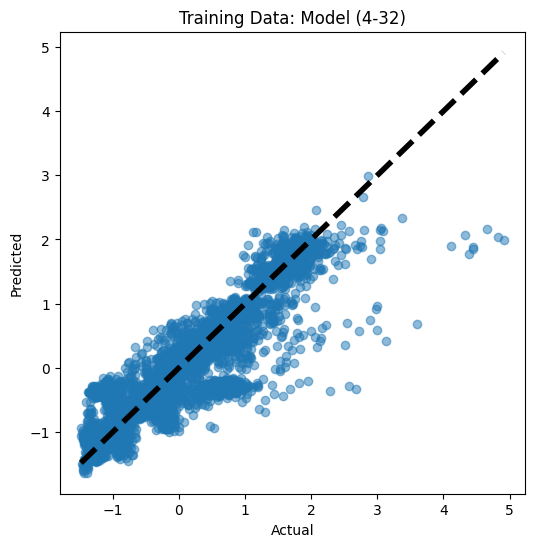

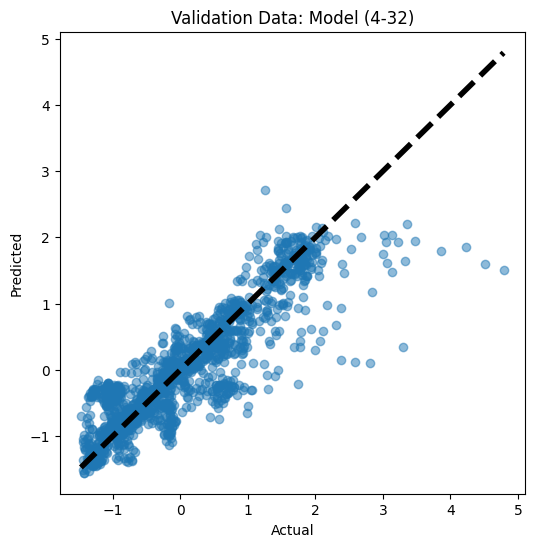

Model (4-32): Train MAE (Orig) = 160799.05368809577, Validation MAE (Orig) = 176682.52503340584
51/51 [==============================] - 0s 1ms/step


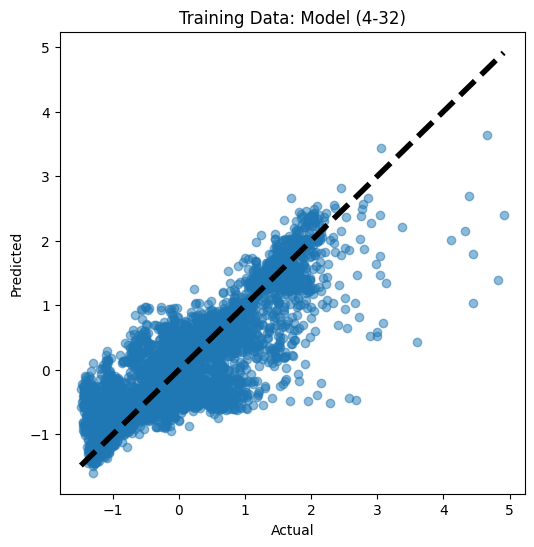

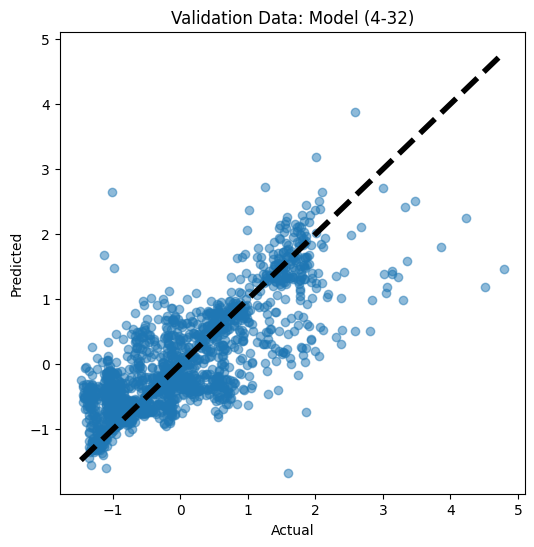

Model (4-32): Train MAE (Orig) = 222307.8679563821, Validation MAE (Orig) = 252688.83374844625
51/51 [==============================] - 0s 2ms/step


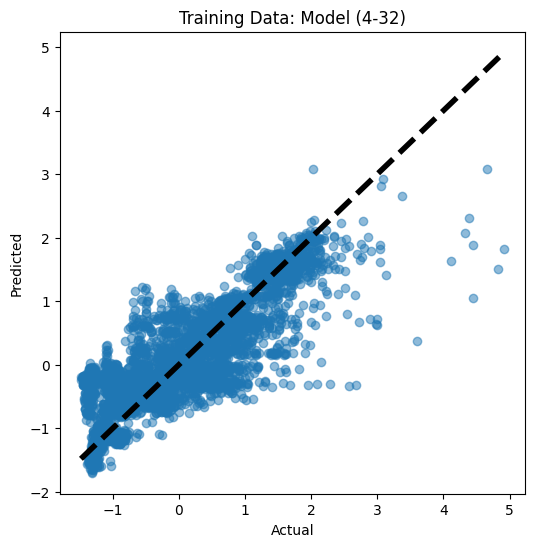

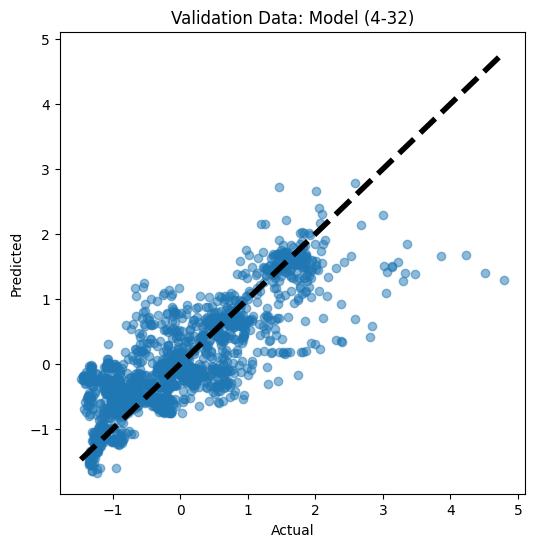

Model (4-32): Train MAE (Orig) = 229493.21882874018, Validation MAE (Orig) = 247641.61791951524
51/51 [==============================] - 0s 2ms/step


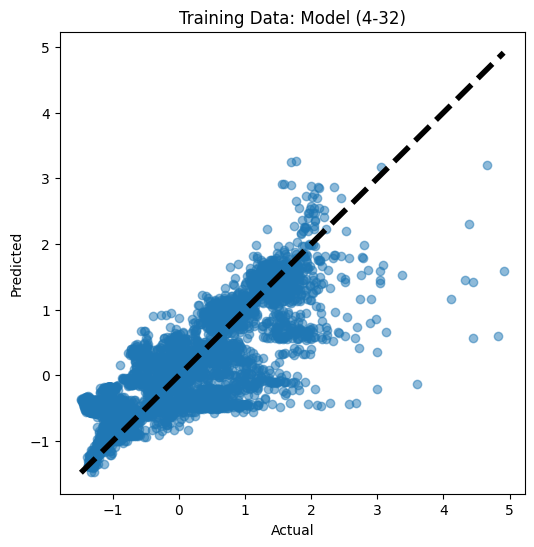

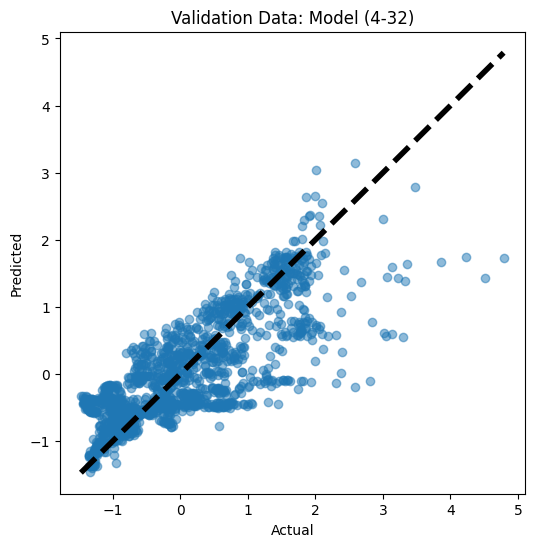

Model (4-32): Train MAE (Orig) = 253142.16384039575, Validation MAE (Orig) = 265144.3780282784
51/51 [==============================] - 0s 2ms/step


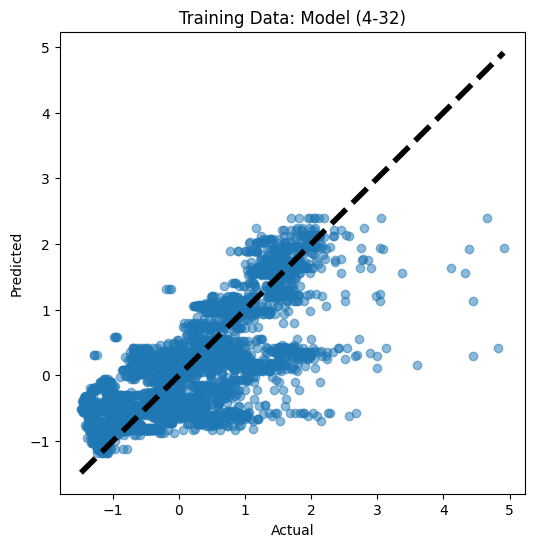

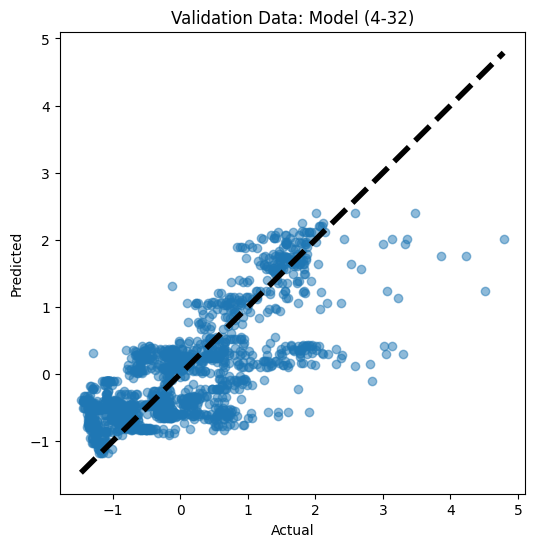

Model (4-32): Train MAE (Orig) = 280653.9364639453, Validation MAE (Orig) = 291907.72863424494
51/51 [==============================] - 0s 2ms/step


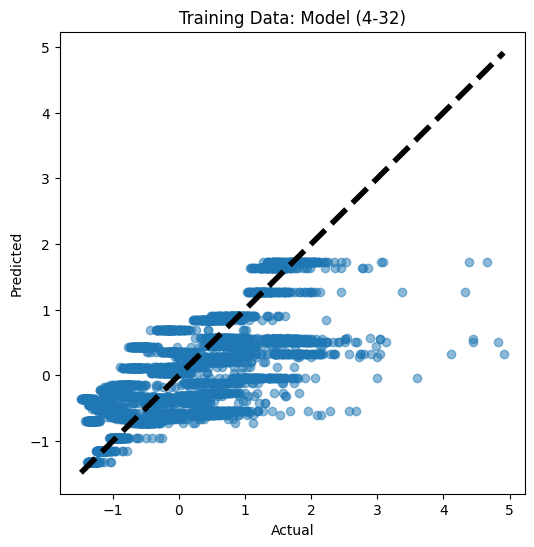

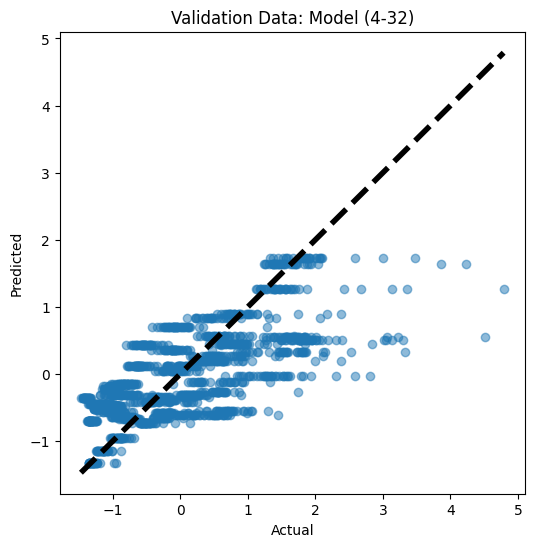

Model (4-32): Train MAE (Orig) = 304372.9562520721, Validation MAE (Orig) = 318986.3832908639


In [47]:
# Shuffle the dataset
shuffled_df = dfz.sample(frac=1, random_state=42)

# Split the dataset into training and validation sets
split_ratio = 0.75
split_index = int(len(shuffled_df) * split_ratio)
train_df = shuffled_df.iloc[:split_index]
val_df = shuffled_df.iloc[split_index:]

# Features to drop in each iteration
features_to_drop = ["CPI", "Temperature", "Holiday_Flag", "Fuel_Price", "Unemployment", "Store"]

# Define a function to create a model with a specified number of hidden layers and neurons per layer
def create_model(num_hidden_layers, neurons_per_layer):
    model = keras.Sequential()
    model.add(layers.Dense(neurons_per_layer, activation='relu', input_shape=[len(X_train.columns)]))
    
    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(layers.Dense(1))
    return model

# Define model architectures to test
models_to_test = [
    (4, 32)
]

# Create a list to store the training history for each model
histories = []

for feature in features_to_drop:
    
    # Prepare input and output data for training and validation sets
    X_train = train_df.drop(["Weekly_Sales", "Date"] + features_to_drop[:features_to_drop.index(feature)], axis=1)
    y_train = train_df["Weekly_Sales"]

    X_val = val_df.drop(["Weekly_Sales", "Date"] + features_to_drop[:features_to_drop.index(feature)], axis=1)
    y_val = val_df["Weekly_Sales"]
    
    # Train and evaluate each model
    for num_hidden_layers, neurons_per_layer in models_to_test:
        model = create_model(num_hidden_layers, neurons_per_layer)
        optimizer = Adam(learning_rate=0.001) # Default 0.001
        model.compile(loss='mean_squared_error', optimizer=optimizer)

        checkpoint = ModelCheckpoint(f"best_model_{num_hidden_layers}_{neurons_per_layer}.h5", save_best_only=True, monitor='val_loss', mode='min')

        history = model.fit(
            X_train, y_train,
            epochs=100,
            verbose=0,
            validation_data=(X_val, y_val),
            # callbacks=[checkpoint]
        )

        # Append the training history to the list
        histories.append(history)

        # Get predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Get predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Scatter plot for training data
        plt.figure(figsize=(6, 6))
        plt.scatter(y_train, y_train_pred, alpha=0.5)
        plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Training Data: Model ({num_hidden_layers}-{neurons_per_layer})')
        plt.show()

        # Scatter plot for validation data
        plt.figure(figsize=(6, 6))
        plt.scatter(y_val, y_val_pred, alpha=0.5)
        plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Validation Data: Model ({num_hidden_layers}-{neurons_per_layer})')
        plt.show()

        # Calculate mean absolute error (MAE)
        train_mae = mean_absolute_error(y_train, y_train_pred.reshape(-1))
        val_mae = mean_absolute_error(y_val, y_val_pred.reshape(-1))

        # Apply inverse transformation to predictions and true target values
        y_train_pred_orig = (y_train_pred * y_std) + y_mean
        y_train_orig = (y_train * y_std) + y_mean
        y_val_pred_orig = (y_val_pred * y_std) + y_mean
        y_val_orig = (y_val * y_std) + y_mean

        # Calculate evaluation metrics on the original scale
        train_mae_orig = mean_absolute_error(y_train_orig, y_train_pred_orig)
        val_mae_orig = mean_absolute_error(y_val_orig, y_val_pred_orig)

        print(f"Model ({num_hidden_layers}-{neurons_per_layer}): Train MAE (Orig) = {train_mae_orig}, Validation MAE (Orig) = {val_mae_orig}")